# Week 4 - Exploring Semantic Spaces (Word Embeddings)
This week, we build on last week's topic modeling techniques by taking a text corpus we have developed, specifying an underlying number of dimensions, and training a model with a neural network auto-encoder (one of Google's word2vec  algorithms) that best describes corpus words in their local linguistic contexts, and exploring their locations in the resulting space to learn about the discursive culture that produced them.

This is our third document representation we have learned: First, we used word counts. Second, we used LDA topic models built around term coocurrence in the same document (i.e., a "bag of words"). Third, documents here are represented as densely indexed locations in dimensions, so that distances between those documents (and words) contain more information, though they require the full vector of dimension loadings (rather than just a few selected topic loadings) to describe. We will explore these spaces to understand complex, semantic relationships between words, index documents with descriptive words, identify the likelihood that a given document would have been produced by a given vector model, and explore how semantic categories can help us understand the cultures that produced them.

Note that most modern natural language processing (NLP) research, at least in computer science, uses word embeddings. This is the foundation of most state-of-the-art models.

Also note that the code in this Notebook can take many minutes or even hours to run. This is the case for most NLP research these days, and it's a good opportunity to start thinking about how to manage high-compute workloads, such as running code on small samples to test it, loading datafiles in [chunks](https://stackoverflow.com/a/25962187), or [multiprocessing](https://en.wikipedia.org/wiki/Multiprocessing).

## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?***
I aim to investigate the discourse of the U.S. President regarding Mexico and its relationship with U.S. economic aid to Mexico. Specifically, I'm interested in examining whether there is a dissonance, such as instances where the U.S. President frequently criticizes Mexico while still providing substantial aid, or instances where U.S. President uses positive language towards Mexico without evident impact on economic assistance. Additionally, I seek to delve deeper into studying the U.S. President's attitudes towards Mexico across various domains and explore how these varied attitudes influence U.S. assistance to Mexico and the overall international relations between the two countries.

## ***Why?***
In international relations analysis, scholars like Wendt argue that state actors' public statements in global settings can invoke a sense of "shame," influencing their behavior based on international reputation and relations. Given U.S.-Mexico relations, Mexico may respond to U.S. attitudes. My research analyzes U.S. President's press conference transcripts, revealing the executive system's attitudes towards Mexico. Limitations include not considering legislative and judicial branches' attitudes, but the President's stance often mirrors the executive system's comprehensive opinion, influencing foreign aid decisions significantly. The research mechanism is thus considered clear and robust.
Alternative approaches may involve analyzing speeches by high-ranking officials or exploring additional sources like tweets. To enhance analysis, expanding the sample with more high-ranking officials and incorporating variables beyond economic aid, such as the frequency of cultural exchange activities, is a reasonable approach.

## ***How?***
I intend to bifurcate the research endeavor into two distinct segments. Initially, I plan to utilize the content from the preceding four weeks to undertake a macro-level examination of the captured corpus. This initial phase will encompass several facets. To begin with, I will employ the lexical distribution data from the second week to conduct an analysis pertaining to the presence of Mexico within the corpus, alongside investigating potential correlations between Mexico's occurrences and mentions of friends and aid. Subsequently, utilizing the content from Week 3, I will delve into an exploration of the distribution of diverse topics within each speech, as well as identifying high-frequency words contained within clusters associated with the four presidents. Week 4 will be dedicated to a more in-depth exploration, employing dynamic topic modeling techniques.

In the second part of this research endeavor, I aspire to conduct a thorough investigation into the correlation between a president's attitude towards Mexico and the actual aid figures allocated to Mexico. My approach will involve the utilization of machine learning techniques. Initially, I will manually label and categorize words based on their emotional connotations. Subsequently, I will employ machine learning algorithms to encode the entire corpus, resulting in the generation of an attitude score for each month. These attitude scores will then undergo regression analysis to discern any potential relationships with foreign aid provided to Mexico.

## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
The sample design (which only contain part of speech sample for each year)for my final project was designed to intentionally select speech and text data related to U.S.-Mexico relations and presidential attitudes and foreign aid allocation. The social actors of concern are the President of the United States and the President's relationship with U.S. foreign aid agencies.

**Advantages**: This sample design has several advantages for answering my research questions. It allowed me to analyze a specific and clearly defined set of textual data directly related to presidential attitudes and foreign aid allocations. By analyzing the speeches and related texts, I can gain insight into the rhetoric and discourse on the subject, providing a nuanced understanding of the subject.

**Limitations**: However, there are some limitations to this approach. It may not capture all the nuances of foreign policy decisions that involve complicating factors beyond presidential speeches. In addition, the sample may not be representative of all aspects of the U.S.-Mexico relationship and may ignore other influential actors or policies.


**Alternative approach**: To mitigate these limitations, another approach could involve a broader comprehensive review of diplomatic documents, policy papers, and communications between various government agencies. This would provide a more comprehensive view of foreign policy decision-making that goes beyond just focusing on presidential speeches.


**Scaling up**: To scale this sample to a higher level of publication, I could expand the dataset to include speeches and texts from a wider range of time periods and governments. In addition, the introduction of sentiment analysis and machine learning algorithms to assess attitudes and predict foreign aid trends can enhance the complexity of research and appeal to a wider academic audience.

In [ ]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-97wwpakb
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-97wwpakb
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done


In [ ]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

# Getting our corpora

Instead of downloading our corpora, we have download them in advance; a subset of the [senate press releases](https://github.com/lintool/GrimmerSenatePressReleases) are in `grimmerPressReleases`. We will load them into a DataFrame, but first we need to define a function to convert directories of text files into DataFrames:

In [ ]:
def loadDir(targetDir, category):
    allFileNames = os.listdir(targetDir)
    #We need to make them into usable paths and filter out hidden files
    filePaths = [os.path.join(targetDir, fname) for fname in allFileNames if fname[0] != '.']

    #The dict that will become the DataFrame
    senDict = {
        'category' : [category] * len(filePaths),
        'filePath' : [],
        'text' : [],
    }

    for fPath in filePaths:
        with open(fPath) as f:
# Try this line instead if you get an encoding error.
#         with open(fPath, encoding="ISO-8859-1") as f:
            senDict['text'].append(f.read())
            senDict['filePath'].append(fPath)

    return pd.DataFrame(senDict)

In [ ]:
# Here I mount google drive. I stored all the data in the drive so I can extract data file directly from there. If you don't want to use the drive,
# you can always upload the data to /content/ directly.
# We recommend drive for the larger datasets.

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/data')

Mounted at /content/drive


Now we can use the function in all the directories in `data/grimmerPressReleases`. If you are on Google Colab, note that rather than downloading GitHub data to your local machine and then uploading it to Drive, you can more quickly `git clone` directly to Colab, such as `!git clone https://github.com/lintool/GrimmerSenatePressReleases.git /drive/MyDrive/`, which then makes your `dataDir = 'drive/MyDrive/grimmerPressReleases/raw'`.

In [ ]:
#dataDir = 'content/drive/MyDrive/grimmerPressReleases/raw'
dataDir = 'grimmerPressReleases'

senReleasesDF = pd.DataFrame()

for senatorName in [d for d in os.listdir(dataDir) if d[0] != '.']:
    senPath = os.path.join(dataDir, senatorName)
    senReleasesDF = senReleasesDF.append(loadDir(senPath, senatorName), ignore_index = True)

senReleasesDF[:100:10]

,category,filePath,text
0,Kennedy,grimmerPressReleases/Kennedy/13Feb2007Kennedy1...,FOR IMMEDIATE RELEASE AS PREPARED...
10,Kennedy,grimmerPressReleases/Kennedy/13Jun2006Kennedy1...,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...
20,Kennedy,grimmerPressReleases/Kennedy/13Nov2007Kennedy5...,FOR IMMEDIATE RELEASE WASHINGTON ...
30,Kennedy,grimmerPressReleases/Kennedy/13Sep2006Kennedy5...,FOR IMMEDIATE RELEASE BOSTON MA Se...
40,Kennedy,grimmerPressReleases/Kennedy/14Dec2005Kennedy1...,FOR IMMEDIATE RELEASE Washington ...
50,Kennedy,grimmerPressReleases/Kennedy/14Feb2005Kennedy3...,FOR IMMEDIATE RELEASE It s regrettab...
60,Kennedy,grimmerPressReleases/Kennedy/14Feb2007Kennedy6...,FOR IMMEDIATE RELEASE Access to ment...
70,Kennedy,grimmerPressReleases/Kennedy/14Jun2005Kennedy1...,FOR IMMEDIATE RELEASE MASSACHUSETTS ...
80,Kennedy,grimmerPressReleases/Kennedy/14Mar2006Kennedy7...,FOR IMMEDIATE RELEASE Mr KENNEDY M...
90,Kennedy,grimmerPressReleases/Kennedy/14May2006Kennedy8...,FOR IMMEDIATE RELEASE FOR IMMEDIATE...


Word2Vec needs to retain the sentence structure so as to capture a "continuous bag of words (CBOW)" and all of the skip-grams within a word window. The algorithm tries to preserve the distances induced by one of these two local structures. This is very different from clustering and LDA topic modeling which extract unordered words alone.

When we normalize here, we don't use the lematized form of the word because we might lose information. Note the paramter in the normalize tokens function.

In [ ]:
#Apply our functions, notice each row is a list of lists now
from tqdm import tqdm
tqdm.pandas()

senReleasesDF['tokenized_sents'] = senReleasesDF['text'].progress_apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
# With the latest spacy versions, you may get warnings with the following line of code. See the discussion here: https://github.com/allenai/allennlp/issues/5036
# senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

senReleasesDF[:100:10]

  0%|          | 0/3904 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 3904/3904 [11:36<00:00,  5.60it/s]


,category,filePath,text,tokenized_sents,normalized_sents
0,Kennedy,grimmerPressReleases/Kennedy/13Feb2007Kennedy1...,FOR IMMEDIATE RELEASE AS PREPARED...,"[[FOR, IMMEDIATE, RELEASE, AS, PREPARED, FOR, ...","[[immediate, release, prepared, delivery, s, h..."
10,Kennedy,grimmerPressReleases/Kennedy/13Jun2006Kennedy1...,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,"[[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, REL...","[[immediate, release, immediate, release, wash..."
20,Kennedy,grimmerPressReleases/Kennedy/13Nov2007Kennedy5...,FOR IMMEDIATE RELEASE WASHINGTON ...,"[[FOR, IMMEDIATE, RELEASE, WASHINGTON, DC, Tod...","[[immediate, release, washington, dc, today, s..."
30,Kennedy,grimmerPressReleases/Kennedy/13Sep2006Kennedy5...,FOR IMMEDIATE RELEASE BOSTON MA Se...,"[[FOR, IMMEDIATE, RELEASE, BOSTON, MA, Senator...","[[immediate, release, boston, ma, senator, edw..."
40,Kennedy,grimmerPressReleases/Kennedy/14Dec2005Kennedy1...,FOR IMMEDIATE RELEASE Washington ...,"[[FOR, IMMEDIATE, RELEASE, Washington, D, C], ...","[[immediate, release, washington, d, c], [toda..."
50,Kennedy,grimmerPressReleases/Kennedy/14Feb2005Kennedy3...,FOR IMMEDIATE RELEASE It s regrettab...,"[[FOR, IMMEDIATE, RELEASE, It, s, regrettable,...","[[immediate, release, s, regrettable, administ..."
60,Kennedy,grimmerPressReleases/Kennedy/14Feb2007Kennedy6...,FOR IMMEDIATE RELEASE Access to ment...,"[[FOR, IMMEDIATE, RELEASE, Access, to, mental,...","[[immediate, release, access, mental, health, ..."
70,Kennedy,grimmerPressReleases/Kennedy/14Jun2005Kennedy1...,FOR IMMEDIATE RELEASE MASSACHUSETTS ...,"[[FOR, IMMEDIATE, RELEASE, MASSACHUSETTS, DELE...","[[immediate, release, massachusetts, delegatio..."
80,Kennedy,grimmerPressReleases/Kennedy/14Mar2006Kennedy7...,FOR IMMEDIATE RELEASE Mr KENNEDY M...,"[[FOR, IMMEDIATE, RELEASE, Mr, KENNEDY, Mr, Pr...","[[immediate, release, mr, kennedy, mr, preside..."
90,Kennedy,grimmerPressReleases/Kennedy/14May2006Kennedy8...,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,"[[FOR, IMMEDIATE, RELEASE, FOR, IMMEDIATE, REL...","[[immediate, release, immediate, release, cont..."


# Word2Vec

We will be using the gensim implementation of [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). Note that newer versions of gensim have different syntax, but if you're using a newer version, you should see informative error messages (e.g., replace `senReleasesW2V['president'][:10]` with `senReleasesW2V['president'].wv[:10]`). The following lines should work out-of-the-box on Google Colab.

To load our data our data we give all the sentences to the trainer:

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
senReleasesW2V = gensim.models.word2vec.Word2Vec(senReleasesDF['normalized_sents'].sum(), sg=0)

Inside the word2vec object, each word has a vector. To access the vector directly, use the square braces (`__getitem__`) method:

In [ ]:
senReleasesW2V.wv['president'][:10] #Shortening because it's very large

array([-2.914853  , -0.35330814, -0.6453861 , -2.8731003 ,  2.14102   ,
        0.78152764, -0.8469779 ,  0.45678326, -2.3338232 ,  2.4808023 ],
      dtype=float32)

If you want the full matrix, `syn0` stores all the vectors:

In [ ]:
senReleasesW2V.wv.vectors

array([[ 4.0722853e-01,  7.7914441e-01,  1.5935795e+00, ...,
        -1.7770790e+00,  4.6485770e-01,  8.6101502e-01],
       [-4.8572958e-01, -6.4862645e-01,  1.0653816e+00, ...,
        -8.4975326e-01, -7.8026962e-01, -1.3037756e-01],
       [-7.5451769e-02, -2.8315139e-01, -1.0252775e+00, ...,
        -4.8215795e-01,  2.3628895e+00,  5.6145573e-01],
       ...,
       [-1.3535589e-01,  2.9870862e-02,  4.4650625e-02, ...,
        -6.6517942e-02,  1.1277579e-03,  1.2661597e-01],
       [-2.5809275e-02,  3.1026212e-02,  3.2309644e-02, ...,
        -3.9076198e-02,  7.7305883e-03,  7.0386447e-02],
       [-5.1991539e-03,  2.7285300e-02,  4.4292949e-02, ...,
        -1.5136875e-03, -1.8800158e-02,  3.9049923e-02]], dtype=float32)

Then, `index2word` lets you translate from the matrix to words:

In [ ]:
senReleasesW2V.wv.index_to_key[10]

'american'

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [ ]:
senReleasesW2V.wv.most_similar('president')

[('administration', 0.7762889862060547),
 ('presidents', 0.7548879384994507),
 ('administrations', 0.695731520652771),
 ('cheney', 0.638484537601471),
 ('linean', 0.5703231692314148),
 ('veto', 0.5696533918380737),
 ('ronald', 0.5443770885467529),
 ('quoting', 0.5377044081687927),
 ('rollback', 0.5196364521980286),
 ('george', 0.5150631070137024)]

In [ ]:
senReleasesW2V.wv.most_similar('war')

[('wars', 0.6631708741188049),
 ('foment', 0.6407153010368347),
 ('afghanistan', 0.63011234998703),
 ('disobedience', 0.628577470779419),
 ('unresisted', 0.6222046613693237),
 ('chaos', 0.610602080821991),
 ('sliding', 0.6074034571647644),
 ('democratization', 0.6028963327407837),
 ('militarily', 0.5897342562675476),
 ('invasion', 0.5866850018501282)]

Find which word least matches the others within a word set (cosine similarity):

In [ ]:
senReleasesW2V.wv.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

'washington'

Find which word best matches the result of a semantic *equation* (here, we seek the words whose vectors best fit the missing entry from the equation: **X + Y - Z = _**.

In [ ]:
senReleasesW2V.wv.most_similar(positive=['clinton', 'republican'], negative = ['democrat'])

[('vetoed', 0.7010154724121094),
 ('bush', 0.629135251045227),
 ('blocked', 0.6187847256660461),
 ('lyndon', 0.6135330200195312),
 ('veto', 0.6134244203567505),
 ('signed', 0.6046305894851685),
 ('signature', 0.568667471408844),
 ('proposing', 0.5685528516769409),
 ('roosevelt', 0.5663424730300903),
 ('bushs', 0.5614659786224365)]

Here we see that **Clinton + Republican - Democrat = Bush**. In other words, in this dataset, **Clinton** is to **Democrat** as **Bush** is to **Republican**. Whoah!

We can also save the vectors for later use:

In [ ]:
senReleasesW2V.save("senpressreleasesWORD2Vec")

We can also use dimension reduction to visulize the vectors. We will start by selecting a subset we want to plot. Let's look at the top words from the set:

In [ ]:
numWords = 50
targetWords = senReleasesW2V.wv.index_to_key[:numWords]

We can then extract their vectors and create our own smaller matrix that preserved the distances from the original:

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(senReleasesW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.40722853,  0.7791444 ,  1.5935795 , ..., -1.777079  ,
         0.4648577 ,  0.861015  ],
       [-0.48572958, -0.64862645,  1.0653816 , ..., -0.84975326,
        -0.7802696 , -0.13037756],
       [-0.07545177, -0.2831514 , -1.0252775 , ..., -0.48215795,
         2.3628895 ,  0.5614557 ],
       ...,
       [-0.8547245 , -0.8046068 ,  0.9059412 , ...,  0.84257865,
         2.0484028 , -0.3741436 ],
       [ 0.01460662, -0.84940517, -0.06637333, ..., -0.46638152,
        -0.10634682, -0.19813927],
       [ 1.3713497 , -2.5031455 , -0.7722239 , ...,  1.7862204 ,
         0.46711865,  0.23951748]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words:

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

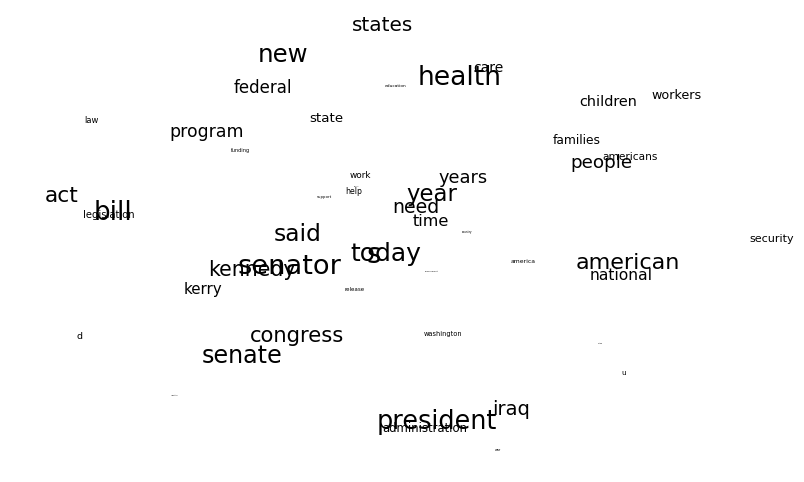

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

My visualization above puts ``said`` next to ``congress`` and ``bill`` near ``act``. ``health`` is beside ``care`` and ``national`` abuts ``security``.

## Adding more context - FastText

Since the original word2vec paper, there have followed a slew of word embedding related methods which innovate and build on them in many ways. One popular extension is FastText ([Bojanowski et al. 2017](https://arxiv.org/abs/1607.04606)), which uses sub-words to generate its vectors. Using subwords means that it is powerful in dealing with unknown words and sparse languages that otherwise have a rich morphological structure. These sub-words are incorporated into the previously skipgram and CBOW methods. For example, if the word is “which”, it is represented as the word itself along with a bag of constituent n-grams. If n=3, the representation looks like <wh, whi, hic, ich, ch>, and we learn a representation for each of these constituents, with the word “which” taking on the average value of these constituents.

FastText can be used either via Gensim or the official package, and primarily has two functions - word representations, and text classification (Joulin et al. 2017). See below for code using the FastText package for playing with word representations, taken from their word representations tutorial (https://fasttext.cc/docs/en/unsupervised-tutorial.html).


In [ ]:
! pip install fasttext

### Representations with FastText

We will follow the instructions in the FastText tutorial to prepare our data, (Wikipedia). You can either follow the instructions on the page for setting the data, or download/copy it to drive it from this [Google Drive link](https://drive.google.com/file/d/12T3nNzf0a7tdhm1lVyfz9Ix9XVITFMCP/view?usp=sharing).

In this example, we will be training a model - it is also possible to download and use the many pre-trained models.

In [ ]:
import fasttext

In [ ]:
# Replace with the path for where you have placed the 'fil9' file.
file_address = "/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4/fil9.txt"

In [ ]:
model = fasttext.train_unsupervised(file_address, minCount=200, epoch=1)

While FastText is running, the progress and estimated time to completion is shown on your screen. Once the training finishes, the model variable contains information on the trained model, which you can use for querying:



It returns all words in the vocabulary, sorted by decreasing frequency. We can get the word vector by:



In [ ]:
model.get_word_vector("the")

array([ 1.01263069e-01, -5.90192489e-02,  1.61868244e-01, -1.01701789e-01,
        2.11401746e-01,  3.44076864e-02,  1.06779106e-01, -7.01764673e-02,
       -2.77115434e-01, -3.33278567e-01, -2.25600272e-01,  2.84197815e-02,
        4.64334451e-02, -3.16535458e-02,  1.81303080e-02,  4.28940691e-02,
        1.87967479e-01, -2.95054838e-02,  7.59627223e-02,  2.25423761e-02,
        1.01923592e-01, -3.57791893e-02,  1.26660556e-01, -6.02674000e-02,
        7.77557120e-02,  2.25575492e-01,  3.91170114e-01,  2.25593746e-01,
       -2.84654528e-01, -9.91142765e-02,  6.44938052e-02,  2.01031938e-01,
       -6.81440681e-02, -1.06424704e-01,  4.65644971e-02,  1.19772151e-01,
       -6.29343688e-02,  3.63371581e-01,  4.77561578e-02,  6.11040592e-02,
       -8.36888999e-02, -4.58102636e-02, -1.21765435e-01,  9.46124494e-02,
        2.85717428e-01, -1.05698608e-01,  4.03688736e-02,  1.54146299e-01,
       -1.79450721e-01, -9.32932720e-02,  7.56328460e-03, -1.15344204e-01,
        1.28116474e-01,  

In [ ]:
model.save_model("fil9.bin")

In [ ]:
# when we want to use the model again
model = fasttext.load_model("fil9.bin")

Let's now print some vectors.

In [ ]:
[model.get_word_vector(x) for x in ["asparagus", "pidgey", "yellow"]]

[array([-0.14006662, -0.07485355,  0.319586  , -0.04093548,  0.09198429,
         0.1261278 , -0.03269082, -0.11055066,  0.04655714, -0.1326036 ,
        -0.04546691, -0.25087675,  0.18515807,  0.14625898, -0.06811476,
         0.05070682,  0.17836626,  0.04091097, -0.08842913,  0.151132  ,
         0.06338568, -0.17596854, -0.07060655,  0.1902626 , -0.0789043 ,
         0.03498681,  0.43267778,  0.12663811, -0.14121874, -0.0656484 ,
         0.05628384,  0.25708377,  0.20422208, -0.03867839,  0.10115422,
        -0.02700523, -0.11787999,  0.32505086, -0.05171636,  0.136551  ,
        -0.17223425,  0.25701734, -0.22905089, -0.04056008,  0.0833502 ,
         0.15513909,  0.37595323, -0.04926715, -0.15345646,  0.21379124,
        -0.18380232,  0.01716743, -0.1489495 , -0.15657601,  0.26150805,
        -0.14652215,  0.04858861,  0.3603034 , -0.06512161,  0.16244695,
         0.00835189, -0.01089688,  0.4704638 , -0.09488831, -0.06462533,
         0.3277814 ,  0.16953354, -0.04525212, -0.0

A nice feature is that you can also query for words that did not appear in your data! Indeed words are represented by the sum of their substrings. As long as the unknown word is made of known substrings, there is a representation of it!

As an example let's try with a misspelled word:



In [ ]:
model.get_word_vector("enviroment")

array([-2.70548295e-02,  1.50540456e-01,  2.53648639e-01, -4.23338339e-02,
        1.38390139e-01,  1.23571225e-01, -3.33544403e-01, -3.00642520e-01,
       -5.74875437e-02,  4.31564808e-01, -2.16350675e-01, -1.72045216e-01,
        6.48741424e-02,  4.55947854e-02,  1.11958481e-01, -1.84667960e-01,
        3.20180207e-01, -2.58245885e-01, -5.46172746e-02, -1.11285992e-01,
        2.84395278e-01, -2.85696507e-01, -7.29190707e-02,  1.13132909e-01,
        1.05610386e-01,  2.34497786e-01,  4.10215378e-01,  2.38320827e-01,
       -1.79288089e-01, -5.25667548e-01,  1.53210200e-02,  1.14100046e-01,
        1.30865082e-01, -4.06445339e-02,  6.67985082e-02, -4.82941747e-01,
       -1.17705710e-01,  1.97724909e-01,  2.43855476e-01,  2.99321171e-02,
       -2.99975365e-01,  2.00883836e-01, -1.07507303e-01,  3.99979770e-01,
        2.07314998e-01,  5.43931544e-01, -9.83017087e-02,  2.69692481e-01,
       -2.01667085e-01, -1.80381555e-02,  1.18486591e-01,  1.65626518e-02,
        1.53593928e-01, -

In [ ]:
# Add FastText here

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why?

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

I wll load my president dataset. I will keep the variable sfrom previous home wokr such as `tokenlized words`

In [ ]:
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4')

President = pd.read_csv('President_with_token.csv')
President

,DATE,TITLE,SPEAKER,CITATION,URL,TEXT1,TEXT2,TEXT3,TEXT4,Merged_Text,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
0,16-Feb-01,The President's News Conference With President...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,...",NaN,NaN,NaN,"President Fox. Good afternoon. Good afternoon,...","['president', 'fox', 'good', 'afternoon', 'goo...",1604,"[('president', 'NNP'), ('fox', 'NNP'), ('.', '..."
1,29-Mar-01,The President's News Conference,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...,NaN,NaN,NaN,The President. Good morning. I first want to s...,"['president', 'good', 'morning', 'want', 'plea...",2177,"[('the', 'DT'), ('president', 'NN'), ('.', '.'..."
2,22-Apr-01,The President's News Conference With Summit of...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...,NaN,NaN,NaN,[Prime Minister Jean Chretien of Canada opened...,"['prime', 'minister', 'jean', 'chretien', 'can...",2049,"[('[', '-LRB-'), ('prime', 'NNP'), ('minister'..."
3,11-May-01,The President's News Conference,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b...",NaN,NaN,NaN,"The President. Good afternoon. First, let me b...","['president', 'good', 'afternoon', 'let', 'beg...",1965,"[('the', 'DT'), ('president', 'NN'), ('.', '.'..."
4,24-Aug-01,The President's News Conference in Crawford,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...,this is—you've been reluctant to talk about t...,NaN,NaN,Nominations for Chairman and Vice-Chairman of ...,"['nomination', 'chairman', 'vice', 'chairman',...",2639,"[('nominations', 'NNS'), ('for', 'IN'), ('chai..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,7-Sep-20,The President's News Conference,Donald J. Trump,"Donald J. Trump, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....,I know. I know.\nQ. We're 2 months out from th...,NaN,NaN,The President. Thank you very much. Thank you....,"['president', 'thank', 'thank', 'happy', 'labo...",3461,"[('the', 'DT'), ('president', 'NN'), ('.', '.'..."
103,25-Mar-21,The President's News Conference,Joseph R. Biden,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ...","h God, I miss him. [Laughter]\nQ. Have you—hav...",NaN,NaN,"The President. Please, please sit down. Thank ...","['president', 'sit', 'thank', 'thank', 'good',...",3845,"[('the', 'DT'), ('president', 'NN'), ('.', '.'..."
104,19-Jan-22,The President's News Conference,Joseph R. Biden,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ...",ic thing that's happened to Mother Russia—in t...,to succeed—other than sending more body bags ...,"on drugs? What do you think?\nI mean, I just—I...","The President. Hello, folks. Thanks for being ...","['president', 'hello', 'folk', 'thank', 'good'...",6941,"[('the', 'DT'), ('president', 'NN'), ('.', '.'..."
105,10-Jan-23,The President's News Conference With Prime Min...,Joseph R. Biden,"Joseph R. Biden, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...,"s.\nBut like I said, we're going to make sure ...",NaN,NaN,Moderator. Good afternoon. Good afternoon. And...,"['moderator', 'good', 'afternoon', 'good', 'af...",3609,"[('mo

This stage I adpot the defined function to normalize sentences and tokenlize it to drop the stop words

In [ ]:
#Apply our functions, notice each row is a list of lists now
from tqdm import tqdm
tqdm.pandas()

President['tokenized_sents'] = President['Merged_Text'].progress_apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
President['normalized_sents'] = President['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])

President[:100:10]

  0%|          | 0/107 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 107/107 [05:20<00:00,  2.99s/it]


,DATE,TITLE,SPEAKER,CITATION,URL,TEXT1,TEXT2,TEXT3,TEXT4,Merged_Text,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,tokenized_sents,normalized_sents
0,16-Feb-01,The President's News Conference With President...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,...",NaN,NaN,NaN,"President Fox. Good afternoon. Good afternoon,...","['president', 'fox', 'good', 'afternoon', 'goo...",1604,"[('president', 'NNP'), ('fox', 'NNP'), ('.', '...","[[President, Fox], [Good, afternoon], [Good, a...","[[president, fox], [good, afternoon], [good, a..."
10,23-Mar-02,The President's News Conference With President...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,President Toledo. This is an historic visit ma...,NaN,NaN,NaN,President Toledo. This is an historic visit ma...,"['president', 'toledo', 'historic', 'visit', '...",1935,"[('president', 'NNP'), ('toledo', 'NNP'), ('.'...","[[President, Toledo], [This, is, an, historic,...","[[president, toledo], [historic, visit, friend..."
20,16-May-06,The President's News Conference With Prime Min...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,President Bush. Thank you all. It's my honor t...,NaN,NaN,NaN,President Bush. Thank you all. It's my honor t...,"['president', 'bush', 'thank', 'honor', 'welco...",1168,"[('president', 'NNP'), ('bush', 'NNP'), ('.', ...","[[President, Bush], [Thank, you, all], [It, 's...","[[president, bush], [thank], [honor, welcome, ..."
30,21-Aug-07,The President's News Conference With Prime Min...,George W. Bush,"George W. Bush, The President's News Conferenc...",https://www.presidency.ucsb.edu/documents/the-...,"Prime Minister Harper. Might I, first and fore...",e lost with this is that anybody that breaks t...,NaN,NaN,"Prime Minister Harper. Might I, first and fore...","['prime', 'minister', 'harper', 'foremost', 't...",3831,"[('prime', 'NNP'), ('minister', 'NNP'), ('harp...","[[Prime, Minister, Harper], [Might, I, first, ...","[[prime, minister, harper], [foremost, thank, ..."
40,19-May-10,The President's News Conference With President...,Barack Obama,"Barack Obama, The President's News Conference ...",https://www.presidency.ucsb.edu/documents/the-...,President Obama. Good afternoon. Buenas tardes...,NaN,NaN,NaN,President Obama. Good afternoon. Buenas tardes...,"['president', 'obama', 'good', 'afternoon', 'b...",1740,"[('president', 'NNP'), ('obama', 'NNP'), ('.',...","[[President, Obama], [Good, afternoon], [Buena...","[[president, obama], [good, afternoon], [buena..."
50,16-Nov-11,The President's News Conference With Prime Min...,Barack Obama,"Barack Obama, The President's News Conference ...",https://www.presidency.ucsb.edu/documents/the-...,"Prime Minister Gillard. Good evening, one and ...",NaN,NaN,NaN,"Prime Minister Gillard. Good evening, one and ...","['prime', 'minister', 'gillard', 'good', 'even...",2118,"[('prime', 'NNP'), ('minister', 'NNP'), ('gill...","[[Prime, Minister, Gillard], [Good, evening, o...","[[prime, minister, gillard], [good, evening], ..."
60,22-Apr-16,The President's News Conference With Prime Min...,Barack Obama,"Barack Obama, The President's News Conference ...",https://www.presidency.ucsb.edu/documents/the-...,"Prime Minister Cameron. Well, good afternoon, ...",ainst the United States.\nAnd I think you have...,NaN,NaN,"Prime Minister Cameron. Well, good afternoon, ...","['prime', 'minister', 'cameron', 'good', 'afte...",3282,"[('prime', 'NNP'), ('minister', 'NNP'), ('came...","[[Prime, Minister, Cameron], [Well, good, afte...","[[prime, minister, cameron], [good, afternoon,..."
70,28-Aug-17,The President's News Conference With President...,Donald J. Trump,"Donald J. Trump, The President's News Conferen...",https://www.presidency.ucsb.edu/documents/the-...,President Trump. 

In [ ]:
President.to_csv('President_hw4.csv', index=False)

Give all the sentences to the trainer

In [ ]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
PresidentW2V = gensim.models.word2vec.Word2Vec(President['normalized_sents'].sum(), sg=0)

Use the square braces method to access the vector directly

In [ ]:
PresidentW2V.wv['president'][:10] #Shortening because it's very large

array([-0.265799  ,  0.06031388, -0.05917092, -0.41339454, -0.57998204,
       -0.8437081 ,  0.213563  ,  0.69587326, -0.78702843, -0.2948552 ],
      dtype=float32)

In [ ]:
PresidentW2V.wv.vectors

array([[-0.265799  ,  0.06031388, -0.05917092, ..., -0.5605717 ,
         0.02531701,  0.35047114],
       [-0.2978599 ,  0.6449734 ,  0.60479283, ..., -0.66996133,
         0.09531043,  0.1276264 ],
       [-0.46754032,  0.7466368 ,  0.38180792, ..., -0.4494975 ,
        -0.42391872,  0.2390591 ],
       ...,
       [-0.04183222,  0.06059569,  0.04999172, ..., -0.08750268,
         0.01193649, -0.01952443],
       [-0.01620558,  0.03194321,  0.02516057, ..., -0.05300171,
         0.02021709,  0.00413223],
       [-0.0236613 ,  0.05366047,  0.05553167, ..., -0.07356026,
         0.02665401, -0.0026742 ]], dtype=float32)

Translate from matrix to words

In [ ]:
PresidentW2V.wv.index_to_key[100]

'point'

Find words most similar to president

In [ ]:
PresidentW2V.wv.most_similar('president')

[('donald', 0.8861554265022278),
 ('barack', 0.8833783268928528),
 ('apologies', 0.8562142848968506),
 ('excellency', 0.8555064797401428),
 ('q.', 0.8458698987960815),
 ('thank', 0.8447155356407166),
 ('j.', 0.8358683586120605),
 ('election', 0.8358587622642517),
 ('welcome', 0.830032229423523),
 ('russia', 0.8258788585662842)]

Find words most similar to aid

In [ ]:
PresidentW2V.wv.most_similar('aid')

[('strengthening', 0.9956678152084351),
 ('contributing', 0.9950330853462219),
 ('crucial', 0.9950263500213623),
 ('enhance', 0.9948292374610901),
 ('increased', 0.9946688413619995),
 ('essential', 0.9946135878562927),
 ('favored', 0.9944427609443665),
 ('area', 0.9933594465255737),
 ('expanding', 0.9931094646453857),
 ('potential', 0.9929320812225342)]

Find which word least matches the others within a word set

In [ ]:
PresidentW2V.wv.doesnt_match(['aid', 'friend', 'president', 'mexico'])

'president'

Find which word best matches the result of a semantic equation

In [ ]:
PresidentW2V.wv.most_similar(positive=['obama', 'republican'], negative = ['democrat'])

[('trump', 0.9409562349319458),
 ('bush', 0.9259366393089294),
 ('vice', 0.9148826599121094),
 ('mr', 0.8946740627288818),
 ('fox', 0.8818963170051575),
 ('calderon', 0.8801828026771545),
 ('biden', 0.8600278496742249),
 ('peña', 0.8554993867874146),
 ('putin', 0.8482474684715271),
 ('rousseff', 0.8436331152915955)]

Here we see that Obama + Republican - Democrat = Trump. In other words, in this dataset, Obama is to Democrat as Trump is to Republican

Now, We save the vectors for later use

In [ ]:
PresidentW2V.save("PresidentWORD2Vec")

This stage I use dimension reduction to visulize the vectors.

In [ ]:
numWords = 50
targetWords = PresidentW2V.wv.index_to_key[:numWords]

# Extract their vectors and create smaller matrix that preserved the distances from the original
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(PresidentW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.265799  ,  0.06031388, -0.05917092, ..., -0.5605717 ,
         0.02531701,  0.35047114],
       [-0.2978599 ,  0.6449734 ,  0.60479283, ..., -0.66996133,
         0.09531043,  0.1276264 ],
       [-0.46754032,  0.7466368 ,  0.38180792, ..., -0.4494975 ,
        -0.42391872,  0.2390591 ],
       ...,
       [ 0.0666321 ,  0.200504  ,  0.54433954, ..., -0.5664717 ,
        -0.08606298,  0.00284196],
       [-0.51216096,  0.11946058,  0.46009877, ..., -0.56268895,
        -0.1300067 , -0.23085648],
       [-0.0230893 ,  0.44244826,  0.7610826 , ..., -0.7073803 ,
         0.40404403, -0.11596878]], dtype=float32)

 Use PCA to reduce the dimesions, and T-SNE to project them down to the two we will visualize

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

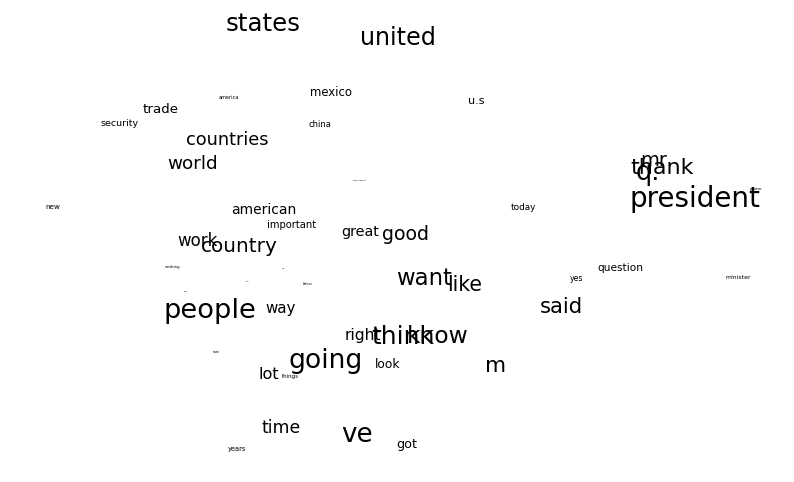

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

In this plot, mexico is related to china and united states, want related to think know and right, president, relsted to thank, question because these new conference is to ask president questions.

Now I will use fasttext, **I will use the adpoted fasttext model from the given instruction in this home work (file9)**

In [ ]:
# Call the model
model = fasttext.load_model("fil9.bin")

Apply this trained model to my corpus

In [ ]:
# Get text
new_corpus = President['Merged_Text'].tolist()

# Define functions and empty list
def get_sentence_vector(text):
    vector = model.get_sentence_vector(text)
    return vector
feature_vectors = []

# Extract eigenvectors
for text in new_corpus:
    text = text.replace('\n', '')
    vector = get_sentence_vector(text)
    feature_vectors.append(vector)

# Converts feature vectors to NumPy arrays
feature_vectors = np.array(feature_vectors)

Now I will use two different ways `TSNE` and `PCA`

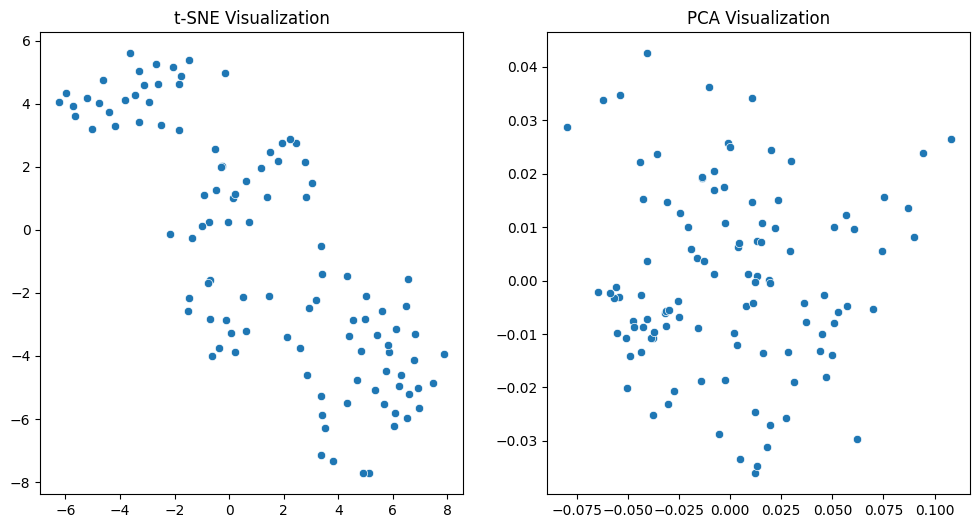

In [ ]:
# Import required packages again
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(feature_vectors)

# Use PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(feature_vectors)

# Visualize t-SNE results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.title('t-SNE Visualization')

# Visualize PCA results
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1])
plt.title('PCA Visualization')

plt.show()

Next, I will follow the instructions and do it again

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(feature_vectors)
reducedPCA_data = pcaWords.transform(feature_vectors)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

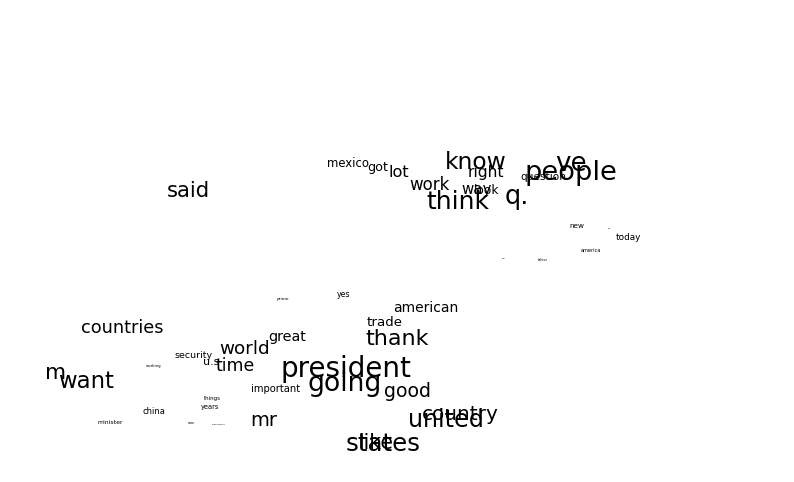

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

This is different from `word2vec`, mexico this time is far away from china and more closer to got, work, think and people. president is close to going, trade, and important

In my opinion, the fasttext modle create more insight than the word2vec model, because it shows the trend of united states' aid logic to mexico and how us view mexico

As I had used addition and subtraction to find Obama and Trump relation with Democratic and Republic, I will try to use average operation

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Load model and my words
model = PresidentW2V
words = ["biden", "bush", "obama"]

# Get vector
word_vectors = [model.wv[word] for word in words if word in model.wv]

# Calculate average
if word_vectors:
    average_vector = np.mean(word_vectors, axis=0)

    # Find most closer word
    similar_words = model.wv.similar_by_vector(average_vector, topn=1)
    most_similar_word = similar_words[0][0]
    print("The word closest to the mean vector is:", most_similar_word)
else:
    print("One or more words are not in the vocabulary")

The word closest to the mean vector is: trump


Here we got the average word of Biden Bush and Obama is Trump, which make sence

# Doc2Vec

Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [ ]:
apsDF = pd.read_csv('APSabstracts1950s.csv', index_col = 0)

apsDF[:10]

,copyrightYear,doi,abstract
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...
5,1951,10.1103/RevModPhys.23.311,A brief account is given of Dyson's proof of t...
6,1951,10.1103/RevModPhys.23.315,A systematics is given of all transitions for ...
7,1951,10.1103/RevModPhys.23.322,A systematics of the -transitions of even A nu...
8,1951,10.1103/RevModPhys.23.328,The available experiments on the absorption sp...
9,1952,10.1103/RevModPhys.24.108,The classical theory of the dynamics of viscou...


We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.

In [ ]:
keywords = ['photomagnetoelectric', 'quantum', 'boltzmann', 'proton', 'positron', 'feynman', 'classical', 'relativity']

In [ ]:
apsDF['tokenized_words'] = apsDF['abstract'].apply(lambda x: lucem_illud.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

Now we can train a Doc2Vec model:

In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words.

In [ ]:
apsD2V.docvecs[1952]

array([ 3.5637864e-01,  2.4886880e+00, -9.9924302e-01,  1.7908607e-01,
        3.4618032e-01,  3.2226047e-01, -7.7552438e-01,  3.3051592e-01,
        6.0324585e-01, -6.1617076e-01, -1.0426248e+00, -1.3197927e+00,
        7.1497929e-01, -2.5852075e-01, -5.4478097e-01,  8.2324511e-01,
       -2.0795561e-01, -4.5585787e-01,  2.9527676e-01, -1.3727970e+00,
        1.7556508e+00,  1.4991693e+00,  7.0679642e-02,  8.3436942e-01,
       -1.9336252e+00, -1.1617864e+00,  8.4536111e-01,  1.0000578e-01,
        2.1614472e-03,  9.2719102e-01,  6.3768643e-01,  1.2998098e-01,
       -1.0405233e+00,  2.2705374e+00, -1.5472018e+00, -1.2030584e+00,
        8.1966472e-01, -8.2707793e-01, -5.3967285e-01, -2.2078650e+00,
        1.5424989e+00, -1.1921740e+00, -1.7530243e+00,  4.5675141e-01,
       -1.4757311e+00,  2.2795996e-01, -1.7798047e+00, -5.3072852e-01,
       -2.6324284e+00, -2.5983134e-01, -1.7914100e+00, -4.6706817e-01,
        7.6015753e-01, -3.1208435e-01, -1.3979026e+00, -2.0586593e+00,
      

The words can still be accessed in the same way:

In [ ]:
apsD2V['atom']

array([-1.4749446 , -1.0886122 ,  0.87859005, -0.63486725,  1.060594  ,
        0.3992267 , -0.12050118,  1.0926499 , -0.39250398,  0.63331944,
       -0.6229945 ,  0.29284334, -0.70233554,  0.5561735 , -0.65698373,
        1.8653054 , -0.6141543 ,  1.5161959 ,  0.3446666 , -1.6982492 ,
       -1.8524336 ,  1.3746783 ,  0.29360577,  0.95947593,  0.2386379 ,
        0.27465397,  0.1418277 ,  0.43159142, -0.74668324,  1.0568713 ,
        0.62878853, -0.6796995 ,  0.05723671,  0.6014314 , -0.652376  ,
       -1.3180497 ,  1.1401461 , -0.9742824 ,  0.6915581 , -0.51536936,
        1.5596457 ,  0.2128661 , -0.93424433, -1.7256649 ,  0.68037105,
       -0.6105326 , -0.6668365 ,  0.6618259 , -0.26373726,  1.4669533 ,
        0.17363656,  0.14769274,  1.8389586 , -0.8339957 ,  0.23071297,
       -0.12473663,  0.14528386, -0.6354845 ,  1.3282381 , -0.28328866,
       -1.2712108 , -0.32071516,  0.95676404, -0.0252414 , -1.1613361 ,
       -0.72647846, -1.0164189 , -0.9053465 ,  0.02908088, -0.29

We can still use the ``most_similar`` command to perform simple semantic equations:

In [ ]:
apsD2V.wv.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

[('atoms', 0.772753119468689)]

This is interesting. **Electron** is to **electrons** as **atom** is to **atoms**. Another way to understand this, developed below is: **electrons - electron** induces a singular to plural dimension, so when we subtract **electron** from **atom** and add **electrons**, we get **atoms**!

In [ ]:
apsD2V.wv.most_similar(positive = ['einstein','law'], negative = ['equation'], topn = 1)

[('behave', 0.6845498085021973)]

In other words **Einstein** minus **equation** plus **law** equals **Meissner**--Walthur Meissner studied mechanical engineering and physics ... and was more likely to produce a "law" than a "equation", like the Meissner effect, the damping of the magnetic field in superconductors. If we built our word-embedding with a bigger corpus like the entire arXiv, a massive repository of physics preprints, we would see many more such relationships like **gravity - Newton + Einstein = relativity**.

We can also compute all of these *by hand*--explicitly wth vector algebra:

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

array([[0.39740032]], dtype=float32)

In the doc2vec model, the documents have vectors just as the words do, so that we can compare documents with each other and also with words (similar to how a search engine locates a webpage with a query). First, we will calculate the distance between a word and documents in the dataset:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron'] ], topn=5 )

[('10.1103/PhysRev.115.678', 0.4280472695827484),
 ('10.1103/PhysRev.113.1545', 0.424076110124588),
 ('10.1103/PhysRev.89.930', 0.4042187035083771),
 ('10.1103/PhysRev.104.317', 0.38814496994018555),
 ('10.1103/PhysRev.98.1020', 0.38208305835723877)]

If we search for the first of these on the web (these are doi codes), we find the following...a pretty good match:

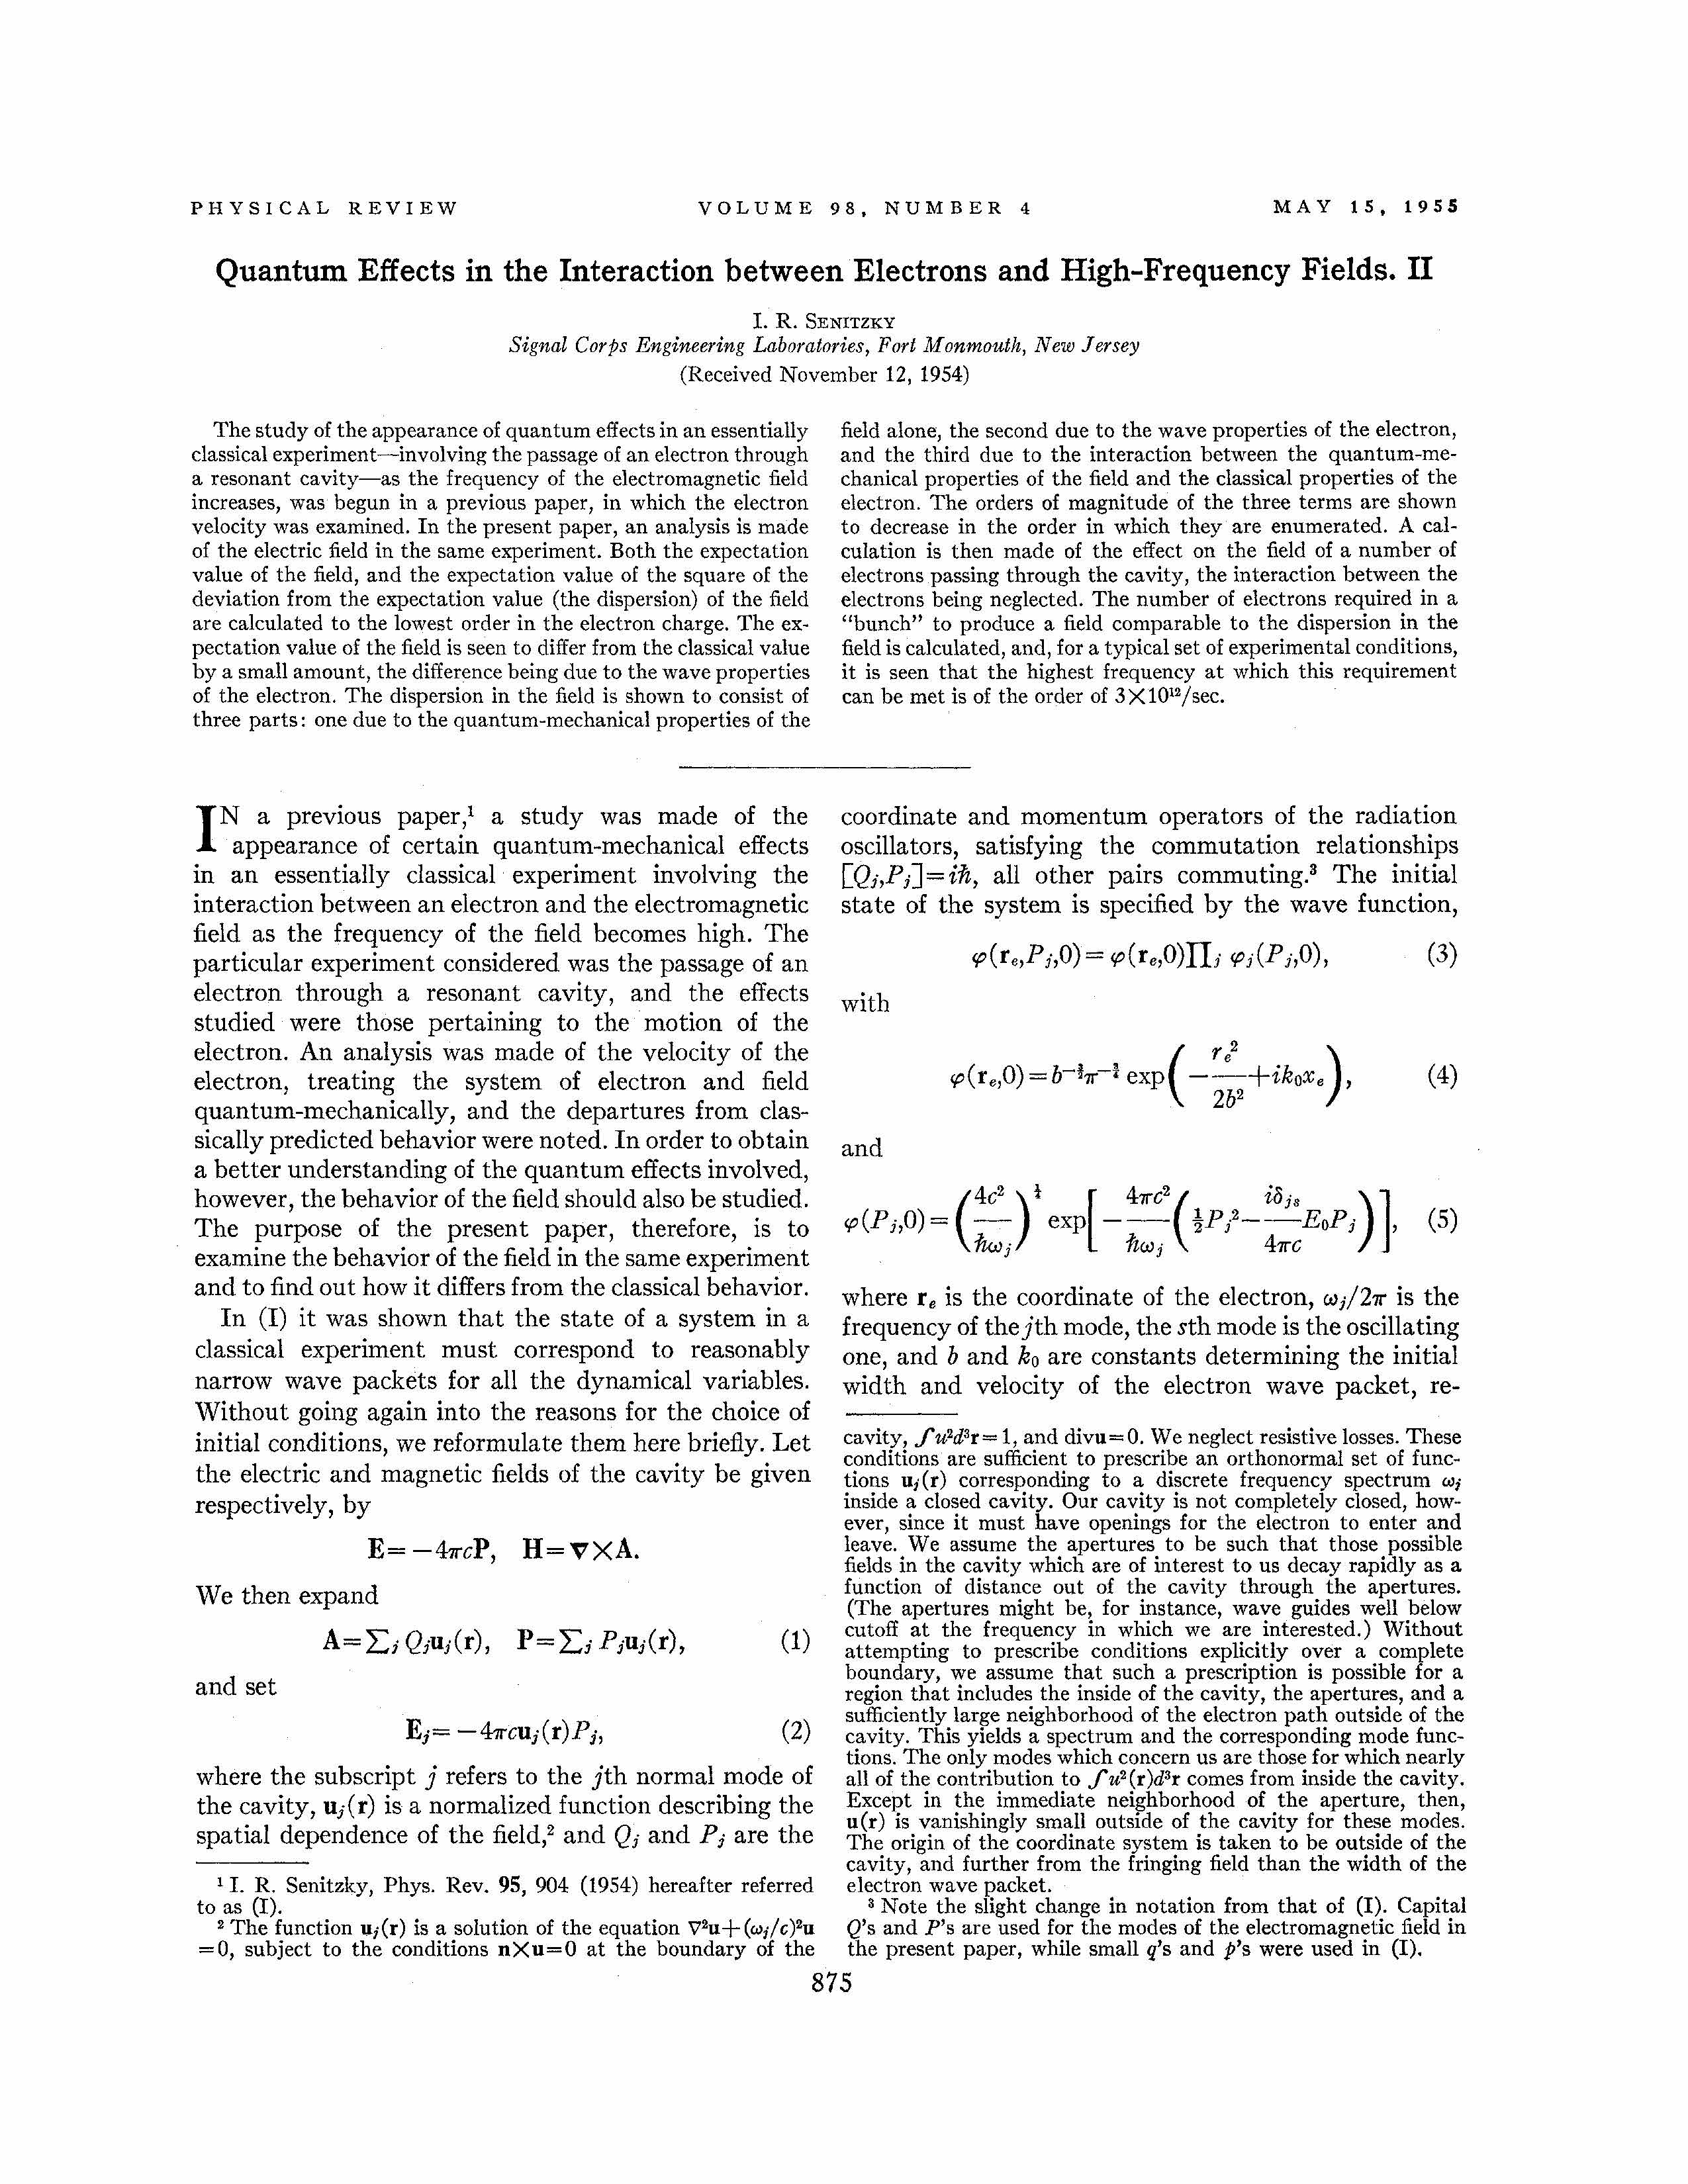

In [ ]:
from IPython.display import Image
Image("PhysRev.98.875.jpg", width=1000, height=1000)

Now let's go the other way around and find words most similar to this document:

In [ ]:
apsD2V.wv.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5)

[('volts', 0.6060793995857239),
 ('microscope', 0.5941206216812134),
 ('radio', 0.5932234525680542),
 ('attainable', 0.5897400975227356),
 ('loeb', 0.5727033615112305)]

We can even look for documents most like a query composed of multiple words:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

[('10.1103/PhysRev.77.614', 0.5110714435577393),
 ('10.1103/PhysRev.88.943', 0.4823648929595947),
 ('10.1103/PhysRev.108.809', 0.4788830578327179),
 ('10.1103/PhysRev.116.415', 0.477861613035202),
 ('10.1103/PhysRev.100.1387', 0.470908522605896)]

Now let's plot some words and documents against one another with a heatmap:

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

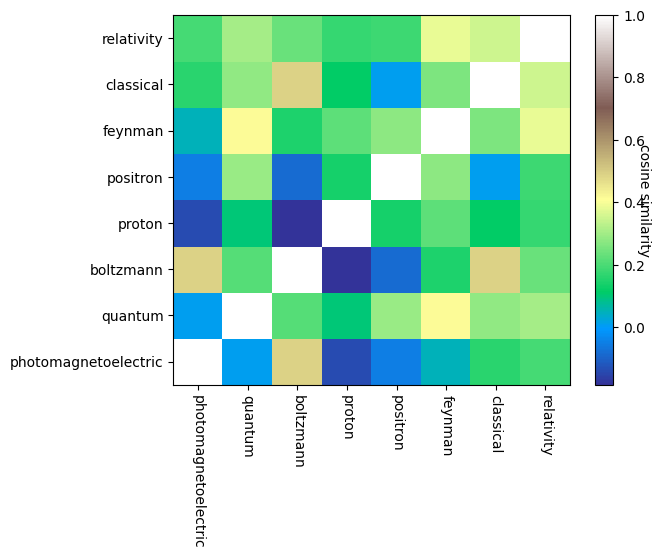

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten documents in the corpus:

In [ ]:
targetDocs = apsDF['doi'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

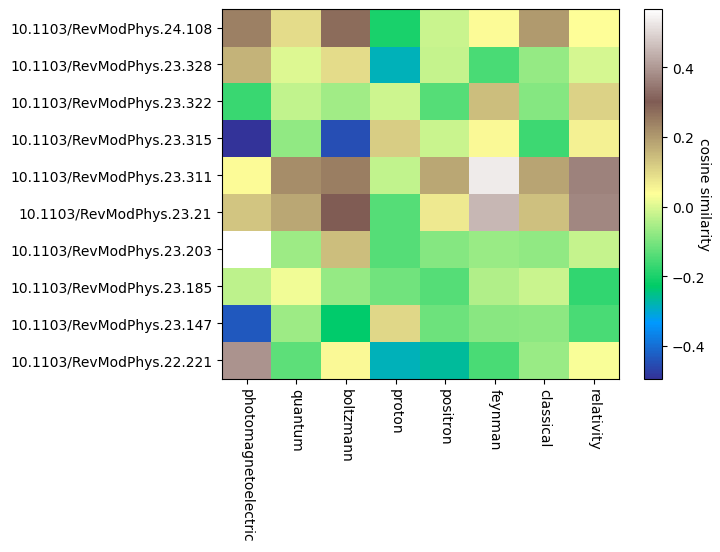

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We will save the model in case we would like to use it again.

In [ ]:
apsD2V.save('apsW2V')

We can later load it:

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

First we load out data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4')

President = pd.read_csv('President_with_token.csv')
President = President[['DATE', 'URL', 'Merged_Text']]
President

Mounted at /content/drive


,DATE,URL,Merged_Text
0,16-Feb-01,https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,..."
1,29-Mar-01,https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...
2,22-Apr-01,https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...
3,11-May-01,https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b..."
4,24-Aug-01,https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...
...,...,...,...
102,7-Sep-20,https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....
103,25-Mar-21,https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ..."
104,19-Jan-22,https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ..."
105,10-Jan-23,https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...


In [ ]:
keywords = ['mexico', 'president', 'aid', 'help']

In [ ]:
President['tokenized_words'] = President['Merged_Text'].apply(lambda x: lucem_illud.word_tokenize(x))
President['normalized_words'] = President['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))
President

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,DATE,URL,Merged_Text,tokenized_words,normalized_words
0,16-Feb-01,https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,...","[President, Fox, Good, afternoon, Good, aftern...","[president, fox, good, afternoon, good, aftern..."
1,29-Mar-01,https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...,"[The, President, Good, morning, I, first, want...","[president, good, morning, want, pleased, hous..."
2,22-Apr-01,https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...,"[Prime, Minister, Jean, Chretien, of, Canada, ...","[prime, minister, jean, chretien, canada, open..."
3,11-May-01,https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b...","[The, President, Good, afternoon, First, let, ...","[president, good, afternoon, let, begin, talki..."
4,24-Aug-01,https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...,"[Nominations, for, Chairman, and, Vice, Chairm...","[nominations, chairman, vice, chairman, joint,..."
...,...,...,...,...,...
102,7-Sep-20,https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....,"[The, President, Thank, you, very, much, Thank...","[president, thank, thank, happy, labor, day, s..."
103,25-Mar-21,https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ...","[The, President, Please, please, sit, down, Th...","[president, sit, thank, thank, good, afternoon..."
104,19-Jan-22,https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ...","[The, President, Hello, folks, Thanks, for, be...","[president, hello, folks, thanks, good, aftern..."
105,10-Jan-23,https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...,"[Moderator, Good, afternoon, Good, afternoon, ...","[moderator, good, afternoon, good, afternoon, ..."


I need to pick some tags

In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in President.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['DATE'])
    docKeywords.append(row['URL']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
President['TaggedAbstracts'] = taggedDocs

Now we train the Doc2Vec model:

In [ ]:
PresidentD2V = gensim.models.doc2vec.Doc2Vec(President['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

I can get vectors for the tags/documents `102`

In [ ]:
PresidentD2V.docvecs[102]

array([ 0.19456592, -0.08061685, -0.113546  , -0.07820213,  0.20403032,
        0.02701485, -0.2093295 ,  0.02646342, -0.544784  , -0.50795454,
        0.09501681, -0.03049783,  0.36390713, -0.04744549,  0.3416501 ,
       -0.05424139,  0.6715098 ,  0.24616376, -0.10146628, -0.21624571,
        0.16571479,  0.10625761,  0.0320149 , -0.1777753 ,  0.25178573,
       -0.21378317, -0.4502047 , -0.05729667,  0.5188627 , -0.03129392,
        0.5537436 ,  0.14100797, -0.34286782, -0.37536126, -0.21826504,
        0.12761363, -0.14688607,  0.00432619, -0.05534296, -0.17576547,
        0.26852754, -0.00362448,  0.3152009 , -0.31840557,  0.23463877,
       -0.08242812, -0.36511916, -0.03927621, -0.01044615, -0.11905465,
        0.2557384 ,  0.25815395, -0.393281  , -0.44920582,  0.06470837,
       -0.1904884 , -0.10817741,  0.21989715,  0.04980116, -0.19909917,
       -0.250087  ,  0.19218136,  0.09280111,  0.2575725 , -0.24289927,
        0.2945162 ,  0.15696105,  0.01506653, -0.09812813, -0.01

The words can still be accessed in the same way, which has more dimension as we do a D2V

In [ ]:
PresidentD2V['aid']

array([ 0.24780937, -0.5593769 ,  0.06105421,  0.34604913,  0.04735921,
       -0.08178727,  0.25575158, -0.03121471, -0.26503858,  0.3821443 ,
       -0.29767525,  0.23621954,  0.34452644,  0.17595562,  0.40790638,
        0.101216  , -0.33276734,  0.03601644, -0.02190935, -0.0344789 ,
        0.05623443, -0.3415475 , -0.35760456, -0.00953195,  0.14333084,
       -0.3800232 , -0.12537536, -0.09788031, -0.28772077,  0.08865705,
        0.32929993,  0.48479363, -0.03123643,  0.18362688, -0.20523408,
       -0.22702402, -0.54190177, -0.31374475,  0.1848459 , -0.1895354 ,
        0.3459117 , -0.52122676,  0.5863316 , -0.3643993 , -0.09568595,
       -0.31250623,  0.22160676,  0.21297076,  0.23588528,  0.10460927,
       -0.1195879 , -0.0499379 , -0.13375618, -0.5109823 , -0.54785806,
        0.07420899,  0.1113824 ,  0.33326447, -0.37765107,  0.10515052,
        0.19176999,  0.26840425,  0.2510988 ,  0.24380958,  0.04775644,
        0.10963062,  0.15744768, -0.11089785, -0.04575463, -0.23

It is very interesting that this time we got Mexico oresident `lula`

In [ ]:
PresidentD2V.wv.most_similar(positive = ['obama','republican'], negative = ['democrat'], topn = 1)

[('lula', 0.933463990688324)]

Here we got relationship between Trump and Mexico

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(PresidentD2V['trump'].reshape(1,-1), PresidentD2V['mexico'].reshape(1,-1))

array([[0.28398424]], dtype=float32)

This is a good match for the president speech on aid

In [ ]:
PresidentD2V.docvecs.most_similar([PresidentD2V['aid']], topn=1 )

[('https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-with-president-vicente-fox-mexico-monterrey-mexico',
  0.5732772946357727)]

Now let's go the other way around and find words most similar to this document

In [ ]:
PresidentD2V.wv.most_similar( [ PresidentD2V.docvecs['https://www.presidency.ucsb.edu/documents/the-presidents-news-conference-with-president-vicente-fox-mexico-monterrey-mexico'] ], topn=5)

[('benefit', 0.863516628742218),
 ('coordinate', 0.8603229522705078),
 ('equal', 0.8512765169143677),
 ('prosperous', 0.8383381962776184),
 ('grande', 0.832897424697876)]

This is a good match with aid

We can even look for documents most like a query composed of multiple words

In [ ]:
PresidentD2V.docvecs.most_similar([PresidentD2V['mexico']+PresidentD2V['aid']+PresidentD2V['friend']], topn=1 )

[('6-Mar-04', 0.7534575462341309)]

It is the speech on 6-Mar-2004, which president talked about the Border Partnership Agreement, shows the aid and friendship with mexico



Now let's plot some words and documents against one another with a heatmap

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = PresidentD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, PresidentD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

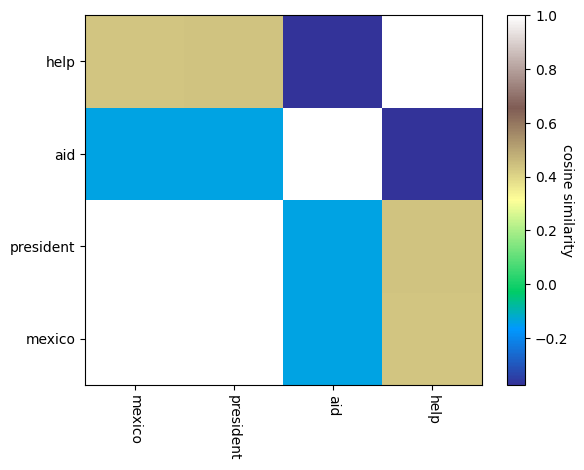

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

This plot shows that president and mexico are highly related with help and aid, but help is not related with aid

Now let's look at a heatmap of similarities between the first ten documents in the corpus

In [ ]:
targetDocs = President['URL'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = PresidentD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, PresidentD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

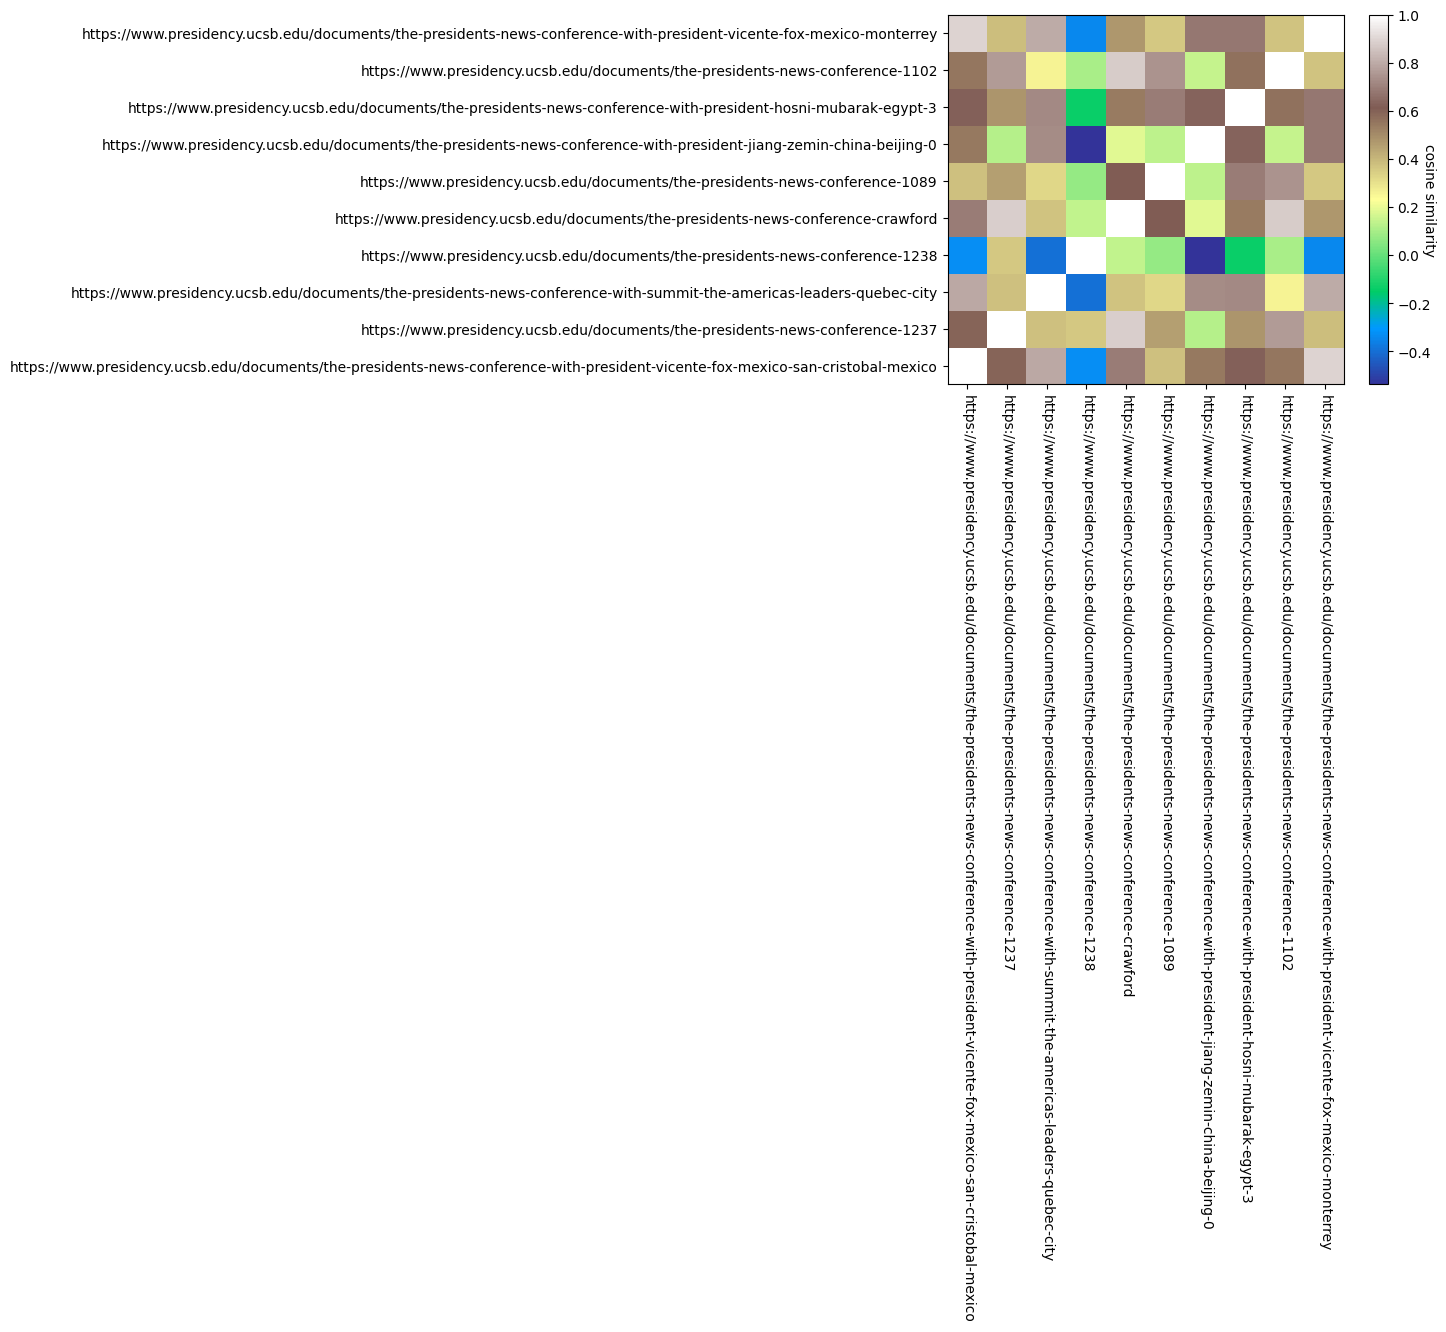

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Thisshows that these speeched are related to a certain extent because I filtered the speech by mexico

Now let's look at a heatmap of similarities between the first ten documents and our keywords

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = PresidentD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, PresidentD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

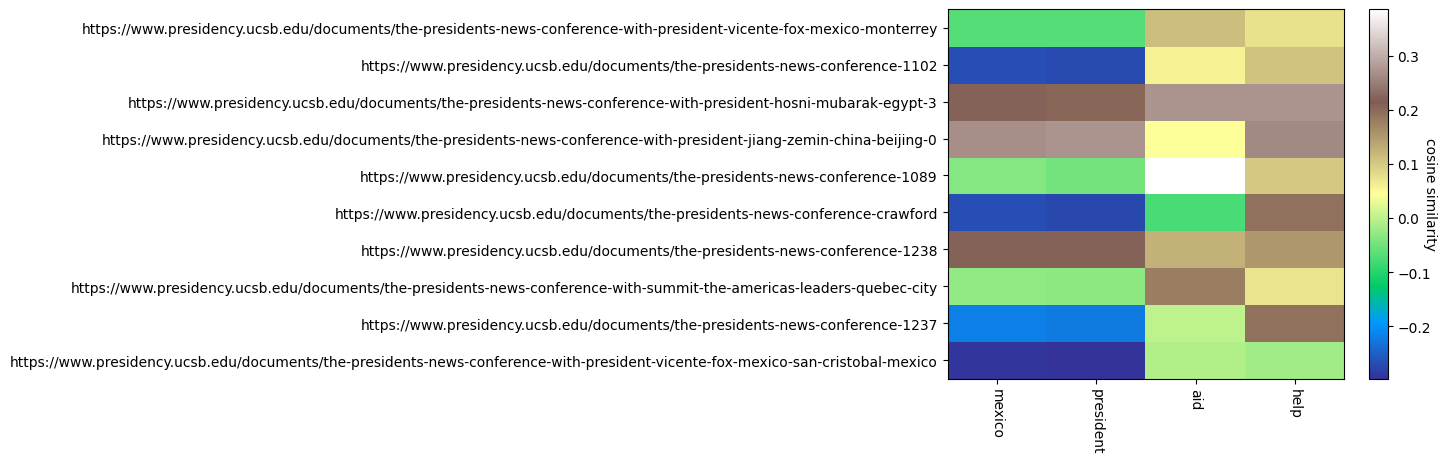

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

This plot shows taht, a large portion od speech talked about help and aid

We will save the model in case we would like to use it again

In [ ]:
PresidentD2V.save('PresidentD2V')

# Projection

We can also project word vectors to an arbitray semantic dimension. To demonstrate this possibility, let's first load a model trained with New York Times news articles.

In [ ]:
nytimes_model = gensim.models.KeyedVectors.load_word2vec_format('nytimes_cbow.reduced.txt')

First we can visualize with dimension reduction

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

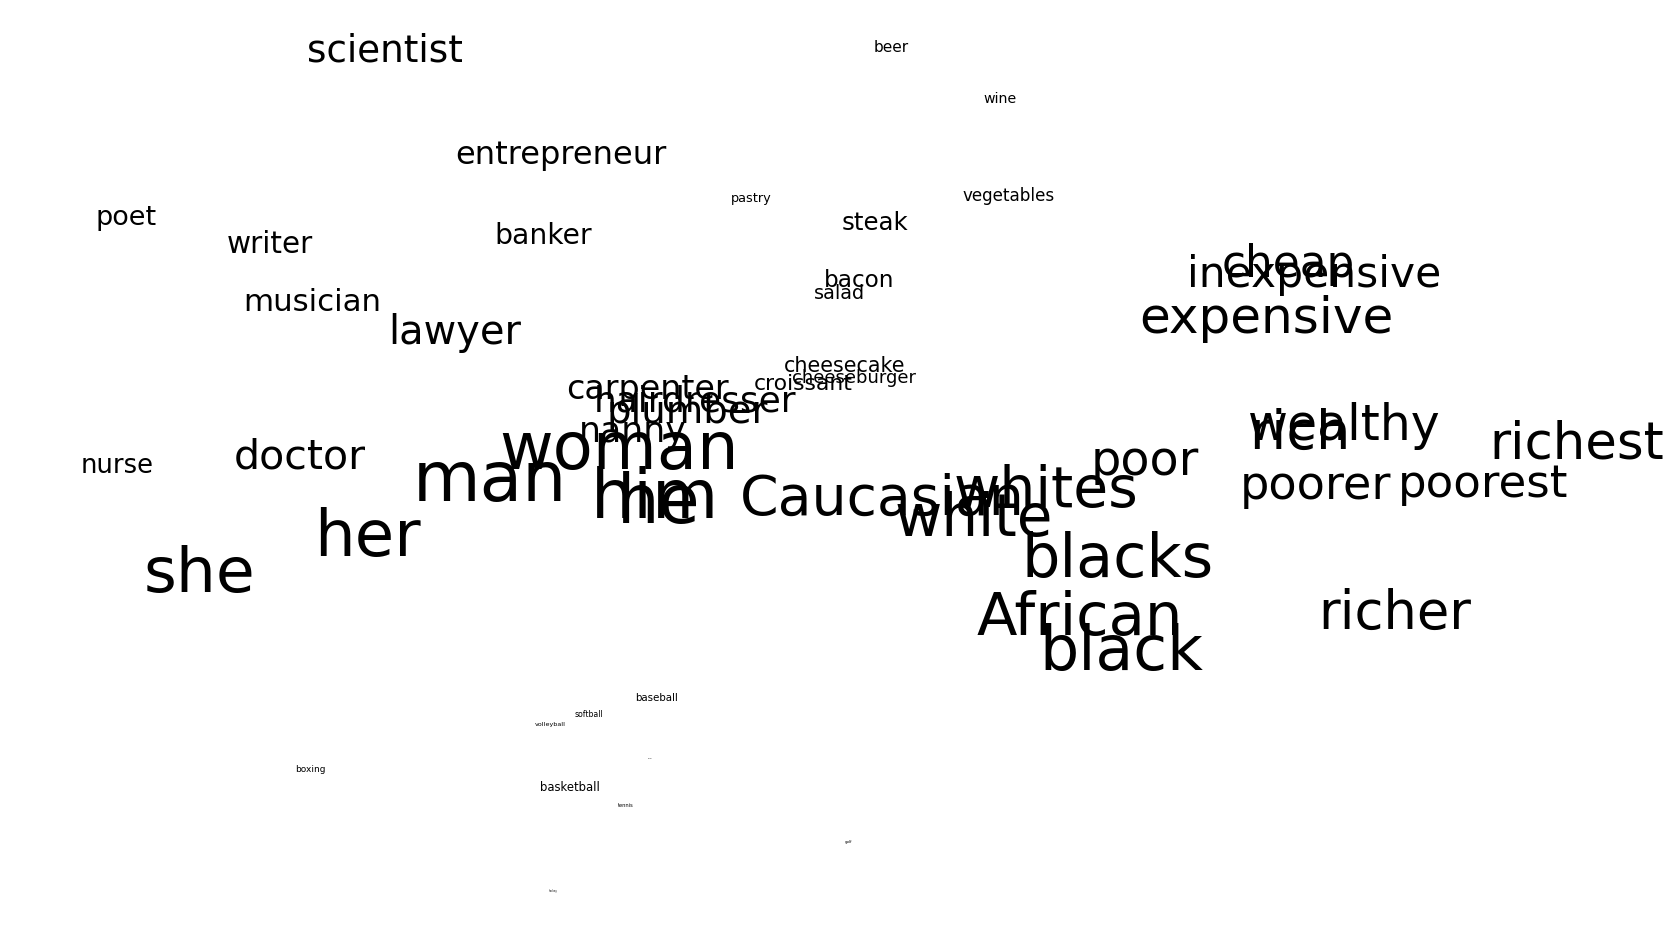

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(nytimes_model, Occupations)
Fooddf = makeDF(nytimes_model, Foods)
Sportsdf = makeDF(nytimes_model, Sports)

Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

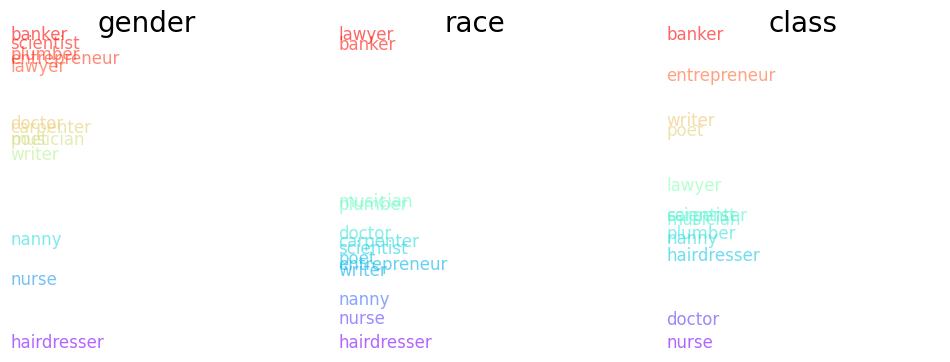

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

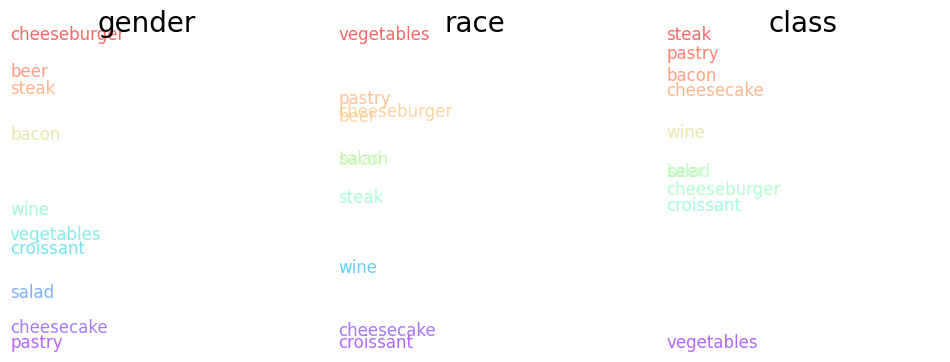

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

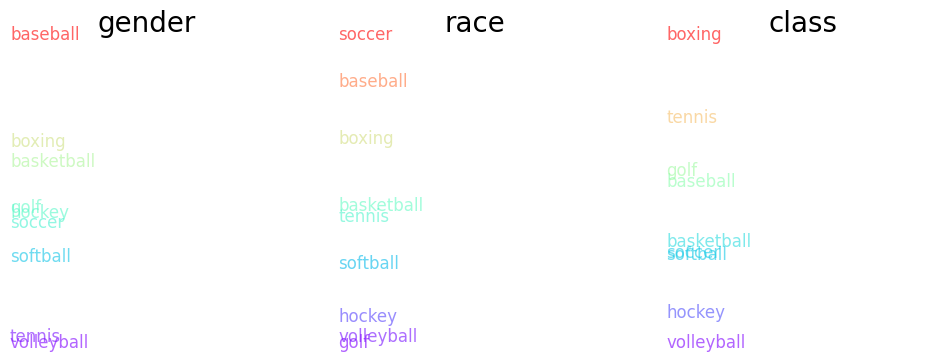

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why?

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

I will use my model

In [ ]:
PresidentD2V = gensim.models.word2vec.Word2Vec.load('PresidentD2V')

In [ ]:
#words to create dimensions
tnytTargetWords = ['black', 'white', 'hispanic','rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest']
#words we will be mapping
tnytTargetWords += ["mexico","canada","america", "bush", "obama", "trump", "biden"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(PresidentD2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [ ]:
pcaWordsPresident = sklearn.decomposition.PCA(n_components = 5).fit(wordsSubMatrix)
reducedPCA_dataPresident = pcaWordsPresident.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsPresident = sklearn.manifold.TSNE(n_components = 2, perplexity=5).fit_transform(reducedPCA_dataPresident)

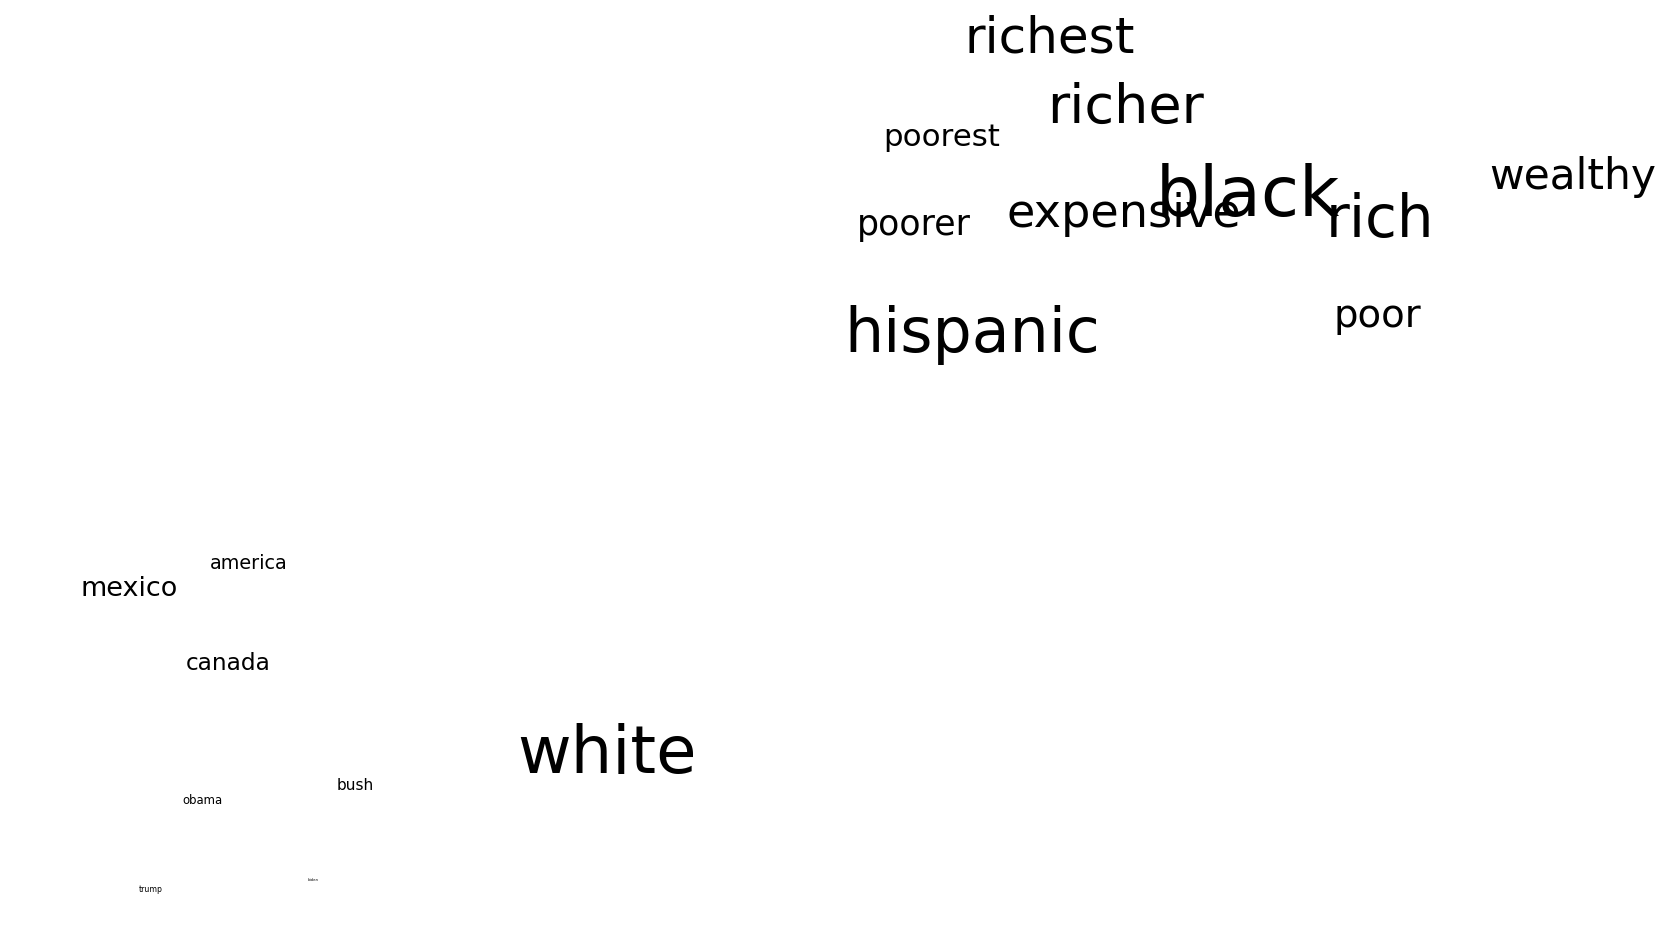

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsPresident[:, 0], tsneWordsPresident[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsPresident[:, 0][i],tsneWordsPresident[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

This plot shows the distribution pattern between race president and countries, which is to a certain extent reasonable

Define some convenient functions for getting dimensions

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

I could only calculate one dimension

In [ ]:
Class = dimension(PresidentD2V, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest'])
Race = dimension(PresidentD2V, ['black', 'hispanic'], ['white'])

Here we have some words

In [ ]:
President  = ["obama", "biden", "bush", "trump"]

Define a function to project words in a word list to each of the three dimensions

In [ ]:
def makeDF(model, word_list):
    r = []
    c = []
    for word in word_list:
        r.append(sklearn.metrics.pairwise.cosine_similarity(PresidentD2V[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(PresidentD2V[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'race': r, 'class': c}, index = word_list)
    return df

Get the projections

In [ ]:
Presidentdf = makeDF(PresidentD2V, President)

Define some useful functions for plotting

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

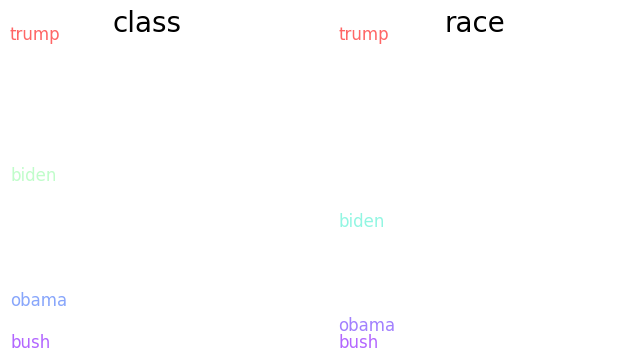

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Presidentdf, 'class')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Presidentdf, 'race')
plt.show()

This plots shows that four presidents distribution by class and race categories. It could seen that trump is most apart from other presidents on race and class dimension, trump is more represent workers and white people. It is interesting that biden is away from obama while bush is cloasely relsted to obama. It seems that class could explain the most variation in the projection of my words because it give more information on biden's distance between trump and obama

**Stretch**: **Because my corpus is hard to find dimension, I will simply explain what will happend**: Averaging multiple antonym pairs to create robust semantic dimensions typically results in an abstract semantic dimension that encompasses various semantic aspects between the antonym pairs. This differs from a single-dimensional projection, which tends to focus on a specific semantic relationship, such as emotional polarity, color, size, etc.

# Linguistic Change or Difference

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf).

In [ ]:
import copy

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.wv.get_vector(w,norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs= [in_other_embed.wv.get_vector(w,norm=True) for w in set(in_other_embed.wv.index_to_key)]

    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/data')

apsDF = pd.read_csv("APSabstracts1950s.csv", index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prepare for wor2vec:

In [ ]:
apsDF['tokenized_sents'] = apsDF['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
apsDF['normalized_sents'] = apsDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
apsDF.head()

,copyrightYear,doi,abstract,tokenized_sents,normalized_sents
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...,"[[A, summarizing, account, is, given, of, the,...","[[summarizing, account, give, research, barium..."
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...,"[[New, tables, of, coulomb, functions, are, pr...","[[new, table, coulomb, function, present, intr..."
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...,"[[Ionization, by, electron, impact, in, diatom...","[[ionization, electron, impact, diatomic, gas,..."
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...,"[[It, is, shown, that, the, conductivity, in, ...","[[show, conductivity, ohmic, cuprous, oxide, l..."
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...,"[[The, factorization, method, is, an, operatio...","[[factorization, method, operational, procedur..."


In [ ]:
apsDF.to_csv('sample.csv')

We will be creating many embeddings so we have created this function to do most of the work. It creates two collections of embeddings, one the original and one the aligned.

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

Now we generate the models:

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(apsDF, 'copyrightYear')

In [ ]:
rawEmbeddings.keys()

dict_keys([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

Lets look at a couple words:

radioactive


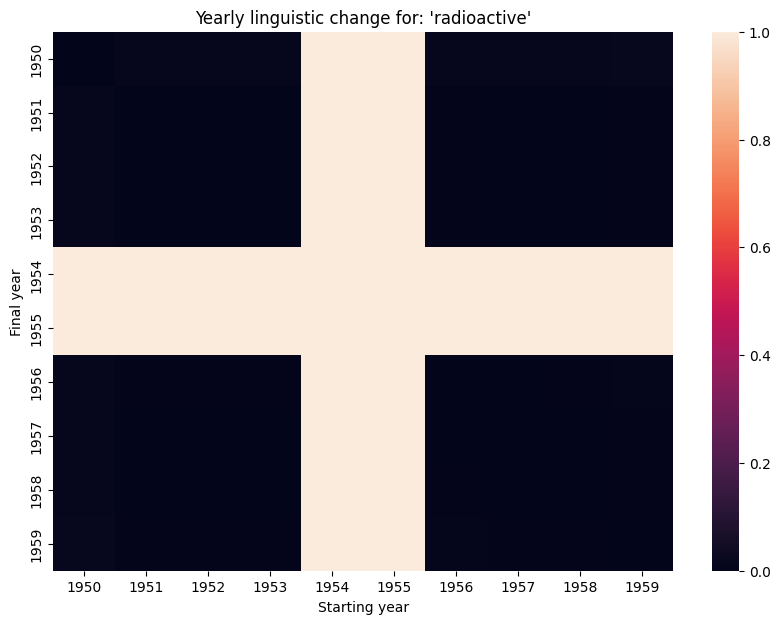

In [ ]:
targetWord = 'radioactive'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

area


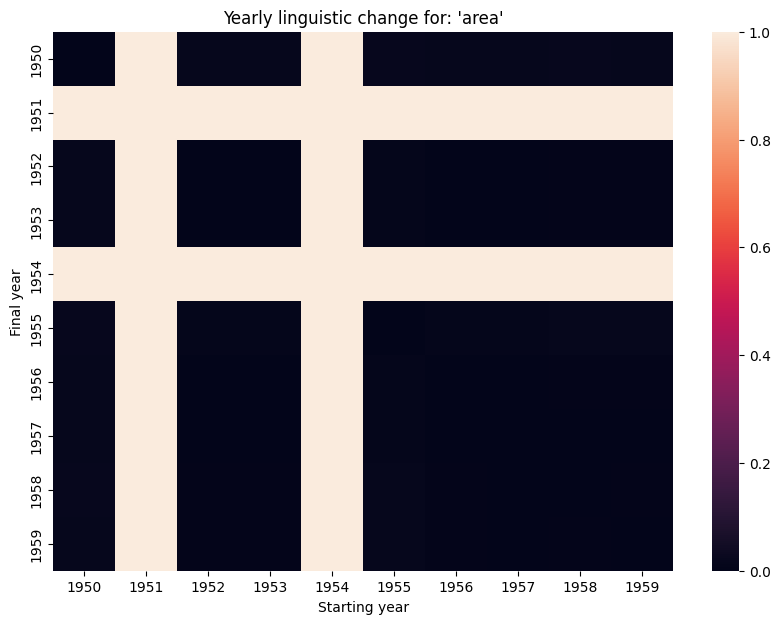

In [ ]:
targetWord = 'area'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[1950][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)


In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 843 words to compare


The most divergent words are:

In [ ]:
wordDivergences[:20]

[('state', 0.9999996929493451),
 ('momentum', 0.9999996177201218),
 ('electric', 0.9999994778258963),
 ('use', 0.9999994615332681),
 ('employ', 0.9999992894731056),
 ('j', 0.9999992845095399),
 ('specific', 0.9999992764972869),
 ('target', 0.9999990675410843),
 ('follow', 0.40794202967356197),
 ('absence', 0.4070316406947484),
 ('optical', 0.32983732289825696),
 ('slightly', 0.3277090366554333),
 ('probability', 0.31591973374276705),
 ('section', 0.31235328307730653),
 ('report', 0.3116347332940862),
 ('additional', 0.3108028302204232),
 ('sum', 0.30979313434786776),
 ('dislocation', 0.3095016959439782),
 ('general', 0.30880473151889587),
 ('observation', 0.30878301635643907)]

And the least:

In [ ]:
wordDivergences[-20:]

[('find', 0.00816725492477417),
 ('vacuum', 0.008157354593276978),
 ('decay', 0.008090788125991821),
 ('theory', 0.008024954795837402),
 ('beta', 0.00800430178642273),
 ('n', 0.007965624332427979),
 ('consideration', 0.007885873317718506),
 ('positive', 0.007881069183349609),
 ('metal', 0.007877326011657715),
 ('electrostatic', 0.007876765727996827),
 ('constant', 0.00784803032875061),
 ('argon', 0.007821661233901978),
 ('inverse', 0.007788968086242676),
 ('support', 0.007768666744232178),
 ('separation', 0.007690107822418213),
 ('vector', 0.007669001817703247),
 ('fill', 0.007624673843383789),
 ('correspond', 0.00762363076210022),
 ('transition', 0.007413786649703979),
 ('shape', 0.00715932846069336)]

compute


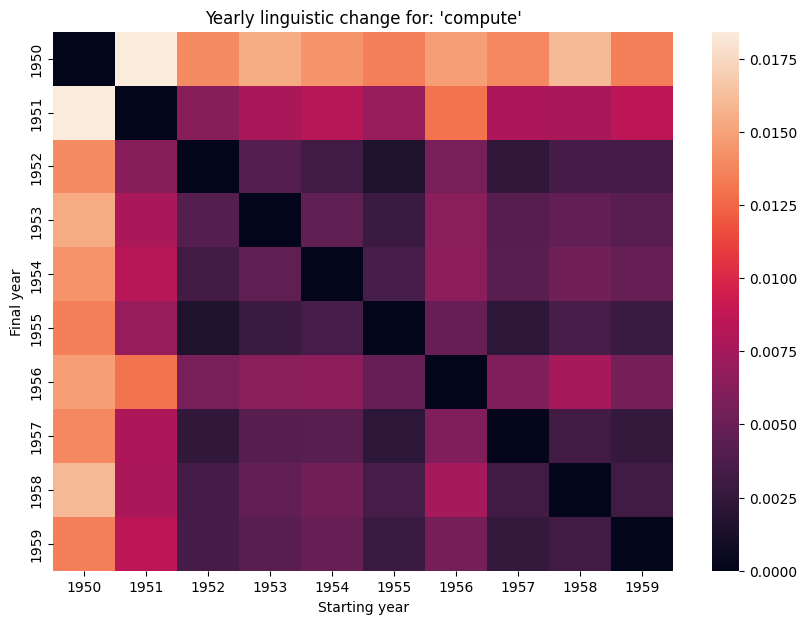

In [ ]:
targetWord = wordDivergences[-200][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

shape


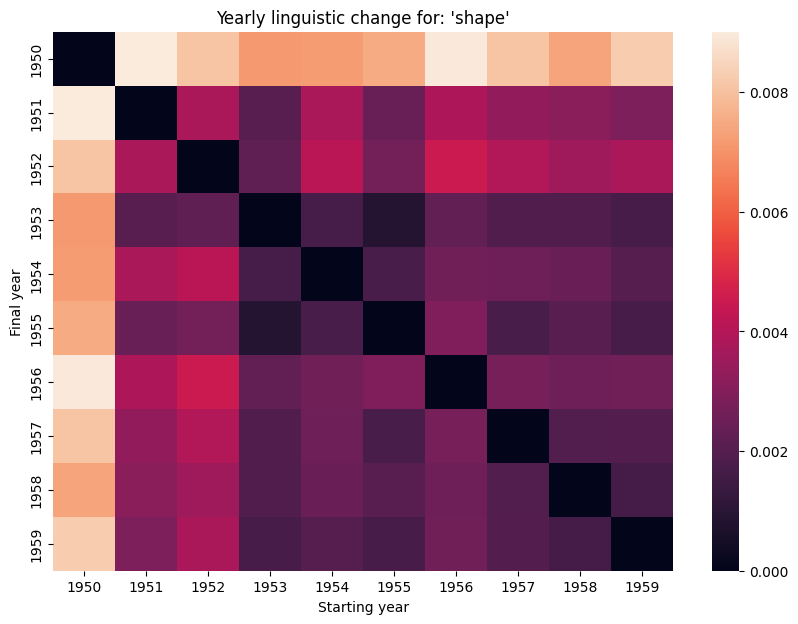

In [ ]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
##We only use a small data here so some of the results may not make sense. You can try the algorithm on your own data!

## COHA

COHA is a historial dataset so it ends up being a good choice to try the same analysis we just did across three different time periods.

We will be using the same data loading procedure as the last notebook, so go through the process to make sure you know what's going on.

In [ ]:
corpora_address = "COHA"

In [ ]:
coha_texts = lucem_illud.loadDavies(corpora_address, return_raw=True)

text_1810s_kso.zip
text_1820s_jsi.zip
text_1830s_bsu.zip
text_1840s_nsq.zip
text_1850s_jpr.zip
text_1860s_psi.zip
text_1870s_vuy.zip
text_1880s_azz.zip
text_1890s_jsq.zip
text_1900s_mse.zip
text_1910s_jue.zip
text_1920s_gte.zip
text_1930s_bie.zip
text_1940s_bsw.zip
text_1950s_ndz.zip
text_1960s_xus.zip
text_1970s_jfy.zip
text_1980s_bkk.zip
text_1990s_bsj.zip
text_2000s_scc.zip


Cool - let us now create our different epochs. This is an important step: I will be using the same 5 epochs I did in the DTM example, but you are recommended to play around with this. I will create a dataframe which logs the year and the genre.

In [ ]:
coha_df = pd.DataFrame(columns=["Year", "Genre", "Epoch", "normalized sents"])

In [ ]:
for article in coha_texts:
    genre, year, id_ = article.split("_")

    year = int(year)

    if year > 1810 and year < 1880:
        epoch = 0
    if year >= 1880 and year < 1913:
        epoch = 1
    if year >= 1913 and year < 1950:
        epoch = 2
    if year >= 1950 and year < 1990:
        epoch = 3
    if year >= 1990:
        epoch = 4

    try:
        if len(coha_texts[article][2]) < 1500000:
            coha_df.loc[id_] = [year, genre, epoch, lucem_illud.normalizeTokens(coha_texts[article][2].decode("utf-8"), lemma=False)]
    except TypeError:
        continue
    except IndexError:
        continue

We can now arrange our word embeddings by either year, genre, or epoch, and see how the words in each of those contexts change.

In [ ]:
rawEmbeddings_epoch = rawModels(coha_df, 'Epoch', text_column_name='normalized sents')

In [ ]:
# rawEmbeddings_genre = rawModels(coha_df, 'Genre', text_column_name='normalized sents')

We now have the raw embeddings for epoch and genre. You can test out the previous analysis on words of your choice.

In [ ]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(epoch)
    model.save(name)

In [ ]:
# for embedding in rawEmbeddings_genre:
#     model = rawEmbeddings_genre[embedding]
#     name = "embedding_genre_" + embedding
#     model.save(name)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [ ]:
# rawEmbeddings_genre_load = file_to_embeddings(".", "genre")

In [ ]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

In [ ]:
rawEmbeddings_epoch_load.keys()

In [ ]:
rawEmbeddings_epoch, compared_epoch = compareModels(coha_df, 'Epoch', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_epoch_load)

In [ ]:
# rawEmbeddings_genre, compared_genre = compareModels(coha_df, 'Genre', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_genre_load)

You now have access to the epoch wise embeddings, and the code to train models genre wise (commented out). You can use the original embeddings, the compared embeddings and such to perform the analysis we did before.

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space?

First, I will define the function again

In [ ]:
import copy

**I have encountered a problem from appying my own dataset. After research I add several codes to first check the NaN and infinity valuse, second, to use float 64, third to conduct procrustes to fix the problem**

In [ ]:
import numpy as np
import copy
import gensim

def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = [in_base_embed.wv.get_vector(w, norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs = [in_other_embed.wv.get_vector(w, norm=True) for w in set(in_other_embed.wv.index_to_key)]

    ### Check NaN and Infinity ###
    if np.isnan(np.array(other_vecs)).any() or np.isnan(np.array(base_vecs)).any():
        raise ValueError("NaN values found in embedding vectors")
    if np.isinf(np.array(other_vecs)).any() or np.isinf(np.array(base_vecs)).any():
        raise ValueError("Infinite values found in embedding vectors")

    ### Use float64 to calculate SVD ###
    m = np.array(other_vecs, dtype=np.float64).T.dot(np.array(base_vecs, dtype=np.float64))
    u, _, v = np.linalg.svd(m)

    ### Conduct Procrustes ###
    ortho = u.dot(v)
    other_embed.wv.vectors = (np.array(other_vecs, dtype=np.float64)).dot(ortho)

    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

I will change the year format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4')

President = pd.read_csv('President_with_token.csv')
President = President.reset_index(drop=True)
President = President[['DATE', 'URL', 'Merged_Text']]
President['Year'] = pd.to_datetime(President['DATE'], format='%d-%b-%y').dt.year
President = President.drop(columns=['DATE'])
President = President[['Year'] + [col for col in President.columns if col != 'Year']]
President['tokenized_sents'] = President['Merged_Text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
President['normalized_sents'] = President['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])
President

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


,Year,URL,Merged_Text,tokenized_sents,normalized_sents
0,2001,https://www.presidency.ucsb.edu/documents/the-...,"President Fox. Good afternoon. Good afternoon,...","[[President, Fox], [Good, afternoon], [Good, a...","[[president, fox], [good, afternoon], [good, a..."
1,2001,https://www.presidency.ucsb.edu/documents/the-...,The President. Good morning. I first want to s...,"[[The, President], [Good, morning], [I, first,...","[[president], [good, morning], [want, pleased,..."
2,2001,https://www.presidency.ucsb.edu/documents/the-...,[Prime Minister Jean Chretien of Canada opened...,"[[Prime, Minister, Jean, Chretien, of, Canada,...","[[prime, minister, jean, chretien, canada, ope..."
3,2001,https://www.presidency.ucsb.edu/documents/the-...,"The President. Good afternoon. First, let me b...","[[The, President], [Good, afternoon], [First, ...","[[president], [good, afternoon], [let, begin, ..."
4,2001,https://www.presidency.ucsb.edu/documents/the-...,Nominations for Chairman and Vice-Chairman of ...,"[[Nominations, for, Chairman, and, Vice, Chair...","[[nomination, chairman, vice, chairman, joint,..."
...,...,...,...,...,...
102,2020,https://www.presidency.ucsb.edu/documents/the-...,The President. Thank you very much. Thank you....,"[[The, President], [Thank, you, very, much], [...","[[president], [thank], [thank], [happy, labor,..."
103,2021,https://www.presidency.ucsb.edu/documents/the-...,"The President. Please, please sit down. Thank ...","[[The, President], [Please, please, sit, down]...","[[president], [sit], [thank], [thank], [good, ..."
104,2022,https://www.presidency.ucsb.edu/documents/the-...,"The President. Hello, folks. Thanks for being ...","[[The, President], [Hello, folks], [Thanks, fo...","[[president], [hello, folk], [thank], [good, a..."
105,2023,https://www.presidency.ucsb.edu/documents/the-...,Moderator. Good afternoon. Good afternoon. And...,"[[Moderator], [Good, afternoon], [Good, aftern...","[[moderator], [good, afternoon], [good, aftern..."


Because I forgot to save the dataframe, when I open it again I need to run again to get tokens, this time I wil save the data

In [ ]:
President.to_csv('president_token_hw4.csv')

Define functions which creates two collections of embeddings, one the original and one the aligned

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

Now we generate the models

In [ ]:
rawEmbeddings, comparedEmbeddings = compareModels(President, 'Year')

Below listed all years that can be traced

In [ ]:
rawEmbeddings.keys()

dict_keys([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

We need to compare them across all permutions

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

Now I look at Yearly linguistic change for `president`

president


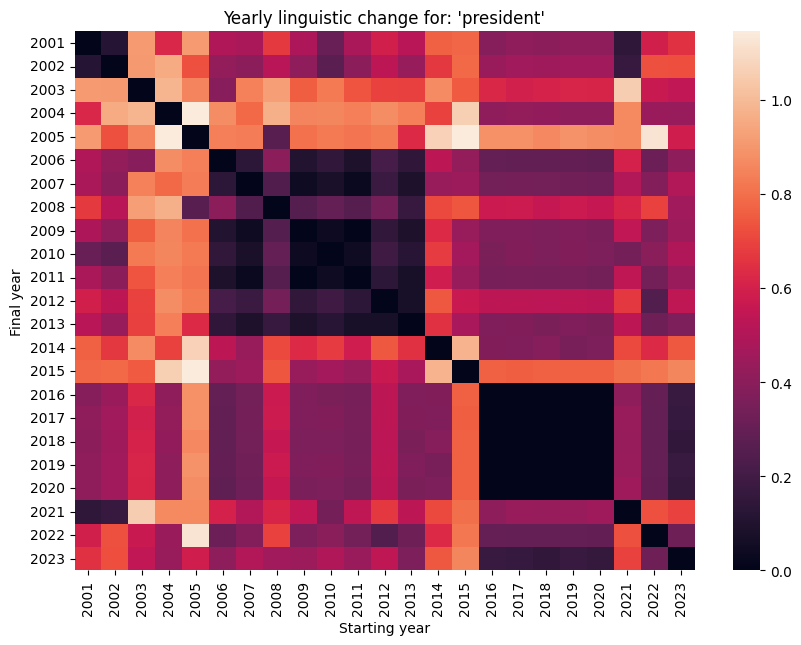

In [ ]:
targetWord = 'president'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

From this plot we can know that within 2006 and 2013, 2016 and 2020 the word president seems to have more lower similarity with values closer to 0. while in other years president is relatively consistent

Next we will look at the word divergence specifically with 2022

In [ ]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[2022][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

We have 11 words to compare because my data set have a small number of speeches

In [ ]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 11 words to compare


The most divergent words are:

In [ ]:
wordDivergences[:5]

[('united', 0.6490542908235293),
 ('thank', 0.6184295447885099),
 ('q.', 0.6166955747485453),
 ('want', 0.6053352548688843),
 ('people', 0.5965709106141572)]

We can see the top 5 words are related to people and want are related to desire, this may show that because they are most divergent, the presidents' want changes a lot due to different personal background and policy focus

And the least:

In [ ]:
wordDivergences[-5:]

[('states', 0.5795181942929591),
 ('ve', 0.5661908247695832),
 ('think', 0.5649672202200905),
 ('president', 0.5024414860797219),
 ('good', 0.4525993391951239)]

The least words are related to values and the spiritual side of people, which means the relationship between mexico is usually good and positive

Now we select words by the word divergences range with -10 to 0

thank


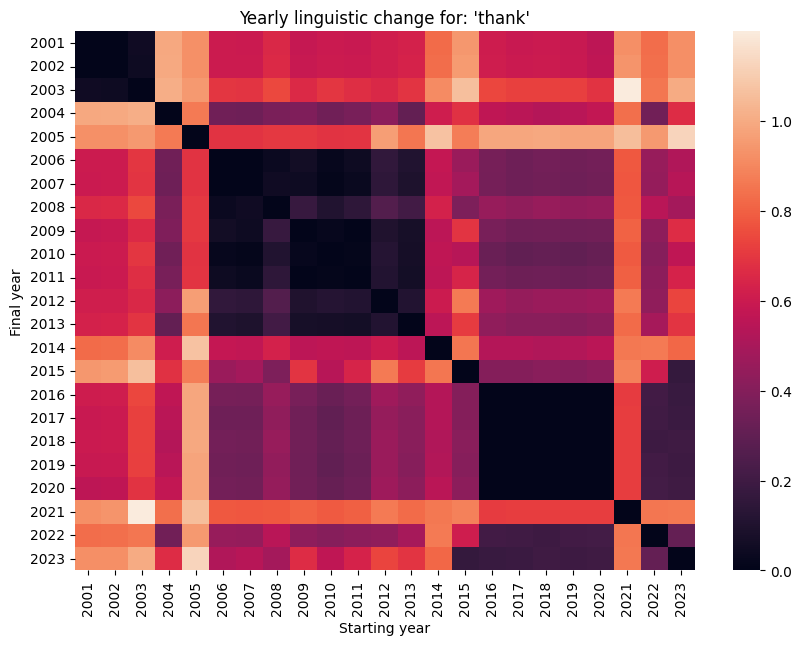

In [183]:
targetWord = wordDivergences[-10][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

The word is thank which shows a relatively similar trend with president

Now we decrease the range to -1 to 0

good


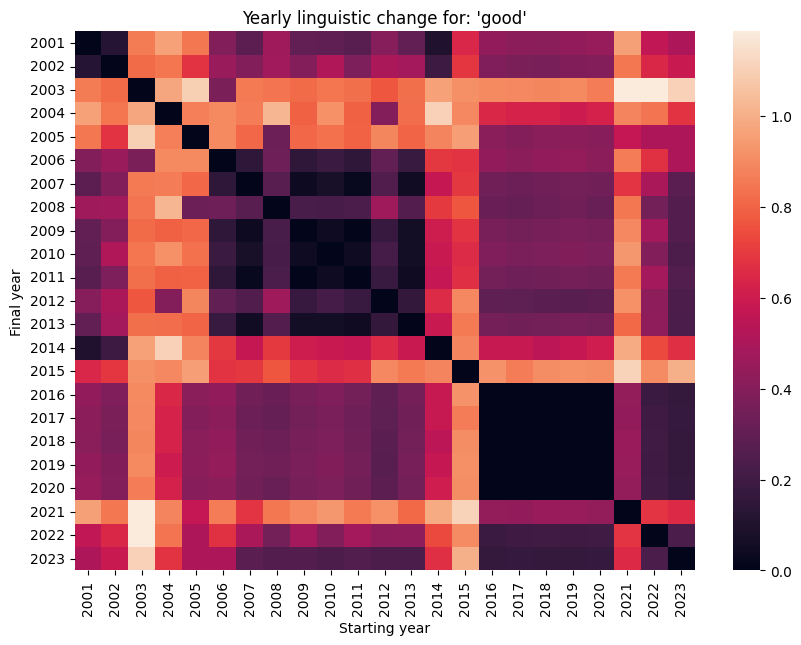

In [180]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

The word is good, and it shows more clusters than the word thank

There is much more we do not have time to cover on word embeddings. If you are interested in other ways to align word embeddings, take a look at the [Dynamic Word Embeddings (DTM) section from the Thinking with Deep Learning course](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=COS_n2RFCJNk) or using the more recent [Temporal Word Embeddings with a Compass (TWEC) package](https://github.com/valedica/twec). There is also a useful section on [debiasing word embeddings](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=JHQ--EsWoxGM), such as the famous, ["Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings"](https://arxiv.org/abs/1607.06520) paper. Below, we include an optional section on topic modeling with word embeddings, which could be useful for final projects.

# **Now, I will try the optional part with my own data**

## Optional: Topic modeling with word embeddings

Recently computer scientists have developed methods to cluster word embeddings, which can be viewed as a topic model, an embedding-based version of conventional topic models that use the document-term matrix (e.g., LDA). One method is Discourse Atoms, first described by Princeton NLP researchers ([Arora et al. 2018](https://arxiv.org/abs/1601.03764)). This uses k-SVD, a generalization of the k-means clustering algorithm to identify topic-like vectors in the n-dimensional word embedding space. Below is code adapted from the first social science paper using Discourse Atoms, [Arseniev-Koehler et al. 2021](https://osf.io/preprints/socarxiv/nkyaq/). It takes as input _gensim_ word vectors.

You are not required to implement this, but for class projects or your own research, this can be more useful than conventional topic models. It runs faster, produces more detailed topics, and in general makes use of more information (i.e., word order within a document) than do conventional topic models. Note there are at least 4 other papers with methods for word embedding clusters:

- Xun, Li, Zhao, Gao, and Zhang 2017: [multivariate Gaussian distributions](https://www.ijcai.org/proceedings/2017/588)
- Dieng, Ruiz, and Blei 2019: ["Embedding Topic Model (ETM)"](https://arxiv.org/abs/1907.04907)
- Angelov 2020: ["Top2Vec"](https://arxiv.org/abs/2008.09470)
- Sia, Dalmia, and Mielke 2020: [(spherical) k-means, k-medoids, von Mises-Fisher Models, Gaussian Mixture Models](https://arxiv.org/abs/2004.14914)

Let's implement the Discourse Atoms method.

In [188]:
from gensim.test.utils import datapath
import re
import string, re
import cython

In [189]:
# The ksvd package has a convenient Approximate k-SVD function.
!pip install ksvd

In [195]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [196]:
import pickle

In [197]:
import math

In [206]:
from gensim.models import Word2Vec
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4')
# Load a gensim word2vec model
w2v = Word2Vec.load("PresidentWORD2Vec")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics.




In [207]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)

##create the saving folder if you need!!

def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/drive/MyDrive/Content_Analysis/Homework-Notebooks/week 4'):
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms.
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [201]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.


    #total VARIANCE in the data: sum of squares
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document).



In [202]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [208]:
##make sure to create a saving path first

dictionary, alpha = do_aksvd(w2v, 150, 5, save=True)

In [209]:
topic_diversity(w2v, dictionary, top_n=25)

0.21493333333333334

We can see that the topic diversity is relative low because is all about president speech and related to mexico

Next, we evaluate the quality of the reformation vector

In [210]:
reconst_qual(w2v, dictionary, alpha)

(117.51713511955104, 0.014451473810299263, 0.9923835771560872)

In [ ]:
#loading back in the model pieces if not already in

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
# dictionary=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
# aksvd=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
# alpha=pickle.load(infile)
# infile.close()

Next, we analyze and show the semantic characteristics of "discourse atoms"

In [211]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in w2v.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


Discourse_Atom 0
['question', 'ask', 'apologies', 'white', 'follow', 'sir', 'thank', 'm', 'legislators', 'laughter', 'questions', 'yes', 'q.', 'house', 'wondering', 'clarification', 'lewis', 'press', 'buhari', 'let', 'election', 'trump', 'mr', 'donald', 'meeting']


Discourse_Atom 1
['america', 'american', 'carolina', 'dakota', 'korea', 'koreans', 'leaders', 'latin', 'korean', 'south', 'central', 'competitive', 'region', 'mexican', 'interests', 'flowing', 'supports', 'star', 'prosperous', 'caribbean', 'opportunity', 'interest', 'atlantic', 'benefit', 'representing']


Discourse_Atom 2
['translated', 'interpreter', 'follows', 'remarks', 'concluding', 'spoke', 'continued', 'trudeau', 'french', 'english', 'translation', 'human', 'ministers', 'abe', 'rights', 'state', 'reporter', 'harper', 'defense', 'beings', 'lofven', 'sharon', 'purchase', 'warming', 'brown']


Discourse_Atom 3
['reform', 'muzzled', 'immigration', 'obama', 'buhari', 'chinchilla', 'vice', 'niinistö', 'trump', 'east', 'cal

We can see the topic is perfectly classified. **For example, in Discourse_Atom 101 is all about health care and affordable insurance.**

In [218]:
# for a specific atom, e.g., 101th atom look at 25 most similar words:
w2v.wv.similar_by_vector(dictionary[101],topn=25)

[('care', 0.6277807950973511),
 ('health', 0.6177758574485779),
 ('right', 0.5883275866508484),
 ('insurance', 0.5879637598991394),
 ('people', 0.570827841758728),
 ('tax', 0.5523456931114197),
 ('uninsured', 0.5385391116142273),
 ('affordable', 0.5334459543228149),
 ('getting', 0.5208991169929504),
 ('want', 0.5203673243522644),
 ('families', 0.5186181664466858),
 ('public', 0.5160720944404602),
 ('lot', 0.5156281590461731),
 ('w', 0.5133410692214966),
 ('cuts', 0.513124406337738),
 ('class', 0.5119993090629578),
 ('thing', 0.506830096244812),
 ('things', 0.502985417842865),
 ('bad', 0.5029581785202026),
 ('costs', 0.5026087760925293),
 ('job', 0.49957290291786194),
 ('cut', 0.4993145763874054),
 ('sacrificing', 0.4974624514579773),
 ('thought', 0.4972280263900757),
 ('preexisting', 0.49509668350219727)]

Above is the top 25 words for Discourse_Atom 101

In [220]:
#useful relevant code:
w2v.wv.index_to_key[3452]

'soviet'

The key is also useful for searching words

Now we can find top 15 words similar to mexico

In [215]:
w2v.wv.most_similar('mexico', topn=15)

[('canada', 0.9679458141326904),
 ('relationship', 0.943023145198822),
 ('european', 0.9374184608459473),
 ('partner', 0.9338539838790894),
 ('partners', 0.911641001701355),
 ('exporter', 0.9045928120613098),
 ('japan', 0.9044603109359741),
 ('strong', 0.9022249579429626),
 ('allies', 0.898040771484375),
 ('china', 0.8965332508087158),
 ('colombia', 0.8939951062202454),
 ('interest', 0.8868697285652161),
 ('largest', 0.8846895694732666),
 ('partnership', 0.8724681735038757),
 ('trading', 0.872054934501648)]

This is interesting that top words are all countries and apart from countries we have strong partnership trading etc, which is consistent to my research

Finds the index position in the text data where the load weight of the word vector corresponding to the word "mexico" is not zero

In [217]:
np.where(alpha[w2v.wv.key_to_index['mexico']] != 0) #get index where the loading of a word onto discourse atoms is not 0

(array([36, 38, 80, 82, 86]),)